# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from keras.regularizers import l1, l2

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

# Importamos los datos

In [4]:
path = '../../../Base de datos con ruido/Trayectorias 200 eval'

## Datos de entrenamiento

### Datos

In [5]:
varftrain = np.load(path + '/varftrain.npy')

In [6]:
np.shape(varftrain)

(7000, 10, 2, 200)

### Coeficientes

In [7]:
coefvarftrain = np.load(path + '/coefvarftrain.npy')

In [8]:
np.shape(coefvarftrain)

(7000, 7)

## Datos de prueba

### Datos

In [9]:
varftest = np.load(path + '/varftest.npy')

In [10]:
np.shape(varftest)

(2000, 10, 2, 200)

### Coeficientes

In [11]:
coefvarftest = np.load(path + '/coefvarftest.npy')

In [12]:
np.shape(coefvarftest)

(2000, 7)

## Datos de validación

### Datos

In [13]:
varfval = np.load(path + '/varfval.npy')

In [14]:
np.shape(varfval)

(1000, 10, 2, 200)

### Coeficienes

In [15]:
coefvarfval = np.load(path + '/coefvarfval.npy')

In [16]:
np.shape(coefvarfval)

(1000, 7)

# Unimos coeficientes con los datos

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((varftrain, coefvarftrain))
test_dataset = tf.data.Dataset.from_tensor_slices((varftest, coefvarftest))
val_dataset = tf.data.Dataset.from_tensor_slices((varfval, coefvarfval))

In [18]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(10, 2, 200), dtype=tf.float64, name=None), TensorSpec(shape=(7,), dtype=tf.int32, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [19]:
BATCH_SIZE = 100
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [20]:
def custom_activation(x):
    return 10 * tf.nn.sigmoid(x)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10, 2, 200)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(200, activation='tanh', kernel_initializer=HeNormal(
    ), kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(100, activation='tanh', kernel_initializer=HeNormal(
    ), kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(50, activation='tanh', kernel_initializer=HeNormal(
    ), kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer=HeNormal(
    ), kernel_regularizer=l1(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7, activation=custom_activation)])

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.regularizers import l1, l2

# Initialize the model
model = Sequential()

# Flatten for dense layers (assuming input shape is 2D)
model.add(Flatten(input_shape=(10, 2, 200)))

# First dense layer
if True:  # add_batch_norm_before_dense_1
    model.add(BatchNormalization())
model.add(Dense(85, activation='relu', kernel_initializer='random_normal', kernel_regularizer=l2(0.001)))

# Second dense layer
if False:  # add_batch_norm_before_dense_2
    model.add(BatchNormalization())
model.add(Dense(22, activation='relu', kernel_initializer='random_normal', kernel_regularizer=l2(0.001)))

# Third dense layer
if True:  # add_batch_norm_before_dense_3
    model.add(BatchNormalization())
model.add(Dense(58, activation='tanh', kernel_initializer='glorot_uniform', kernel_regularizer=l1(0.001)))
if True:  # add_dropout_after_dense_3
    model.add(Dropout(0.13555329635761065))

# Fourth dense layer
if True:  # add_batch_norm_before_dense_4
    model.add(BatchNormalization())
model.add(Dense(52, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.001)))

# Fifth dense layer
if False:  # add_batch_norm_before_dense_5
    model.add(BatchNormalization())
model.add(Dense(72, activation='sigmoid', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.001)))

# Output dense layer (Assuming the same as before)

model.add(Dense(7, activation=custom_activation))

# Display model architecture to verify
# model.summary()


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4000)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 4000)             16000     
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 85)                340085    
                                                                 
 dense_12 (Dense)            (None, 22)                1892      
                                                                 
 batch_normalization_6 (Batc  (None, 22)               88        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 58)               

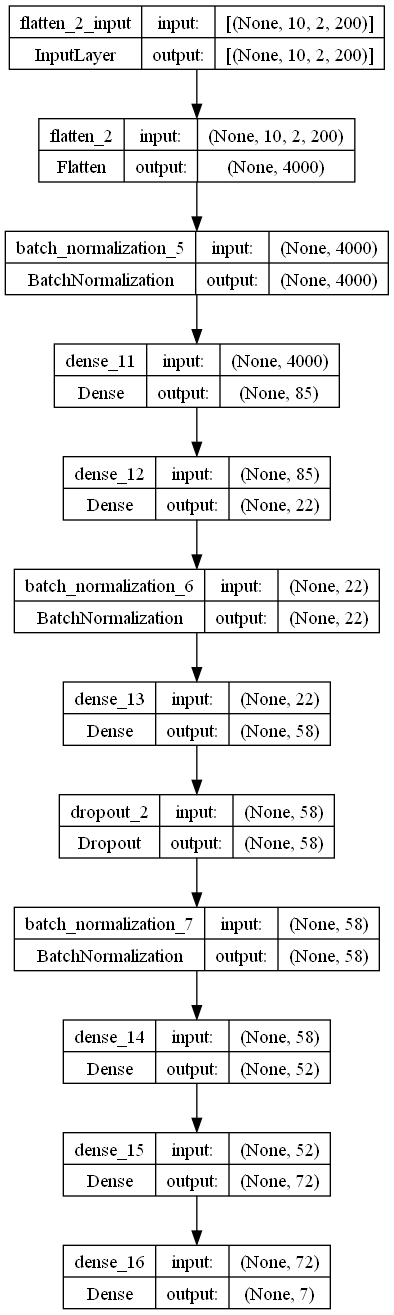

In [33]:
keras.utils.plot_model(model,show_shapes=True)

# Entrenamos el modelo

In [34]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001,clipvalue=100.0)

In [35]:
def total_mae_loss(y_true, y_pred):
    total_loss = 0
    num_parameters = 7
    for i in range(num_parameters):
        total_loss += tf.keras.losses.mean_absolute_error(y_true[:, i], y_pred[:, i])
    tf.print(y_true, summarize = -1)
    tf.print(y_pred, summarize = -1)
    return total_loss / num_parameters

In [36]:
coeficientesnombres = ('a_1', 'a_2', 'b_1', 'b_2', 'd_1', 'd_2', 'n')

def mse_component(i):
    def mse_i(y_true, y_pred):
        return tf.keras.losses.mean_absolute_error(y_true[:, i], y_pred[:, i])

    mse_i.__name__ = coeficientesnombres[i]
    return mse_i

def mean_metric(y_true, y_pred):
    total_loss = 0
    for i in range(7):
        total_loss += mse_component(i)(y_true, y_pred)
    sum_of_true_coefficients = tf.reduce_sum(y_true, axis=-1)
    return total_loss / sum_of_true_coefficients

metrics = [mse_component(i) for i in range(7)] + [mean_metric]

In [37]:
model.compile(optimizer=optimizer,
              loss= 'mean_squared_error',
              metrics=metrics)

In [38]:
def scheduler(epoch, lr):
  if epoch < 400:
    return lr
  else:
    return -1.65e-6*epoch +  0.00166
def adaptive_learning_rate(epoch):
    initial_lr = 0.001
    final_lr = 0.00001  # Updated final learning rate
    start_decay_epoch = 100
    end_decay_epoch = 1000
    
    if epoch < start_decay_epoch:
        return initial_lr
    elif epoch >= start_decay_epoch and epoch <= end_decay_epoch:
        lr_range = initial_lr - final_lr
        decay_epochs = end_decay_epoch - start_decay_epoch
        decay_per_epoch = lr_range / decay_epochs
        return initial_lr - (epoch - start_decay_epoch) * decay_per_epoch
    else:
        return final_lr

In [39]:
val_epochs = 1000

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 100,verbose = 1, 
                                              restore_best_weights = True)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(adaptive_learning_rate)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/1000
70/70 [==============================] - 2s 10ms/step - loss: 7.6142 - a_1: 2.5196 - a_2: 2.5244 - b_1: 2.4710 - b_2: 2.5627 - d_1: 1.5941 - d_2: 1.6751 - n: 1.3210 - mean_metric: 0.4566 - val_loss: 7.9679 - val_a_1: 2.4228 - val_a_2: 2.5474 - val_b_1: 2.5795 - val_b_2: 2.6218 - val_d_1: 1.8660 - val_d_2: 1.9628 - val_n: 1.2541 - val_mean_metric: 0.4754 - lr: 0.0010
Epoch 2/1000
70/70 [==============================] - 0s 6ms/step - loss: 6.1119 - a_1: 2.4122 - a_2: 2.4178 - b_1: 2.1645 - b_2: 2.2745 - d_1: 1.1155 - d_2: 1.1190 - n: 1.2149 - mean_metric: 0.3958 - val_loss: 6.3504 - val_a_1: 2.4173 - val_a_2: 2.5312 - val_b_1: 2.2488 - val_b_2: 2.2747 - val_d_1: 1.3254 - val_d_2: 1.1245 - val_n: 1.2493 - val_mean_metric: 0.4105 - lr: 0.0010
Epoch 3/1000
70/70 [==============================] - 0s 6ms/step - loss: 5.5265 - a_1: 2.3913 - a_2: 2.3695 - b_1: 1.9497 - b_2: 2.0639 - d_1: 0.9406 - d_2: 0.9732 - n: 1.2108 - mean_metric: 0.3703 - val_loss: 5.6218 - val_a_1: 2.3869 -

70/70 [==============================] - 0s 7ms/step - loss: 3.3354 - a_1: 2.0728 - a_2: 2.1099 - b_1: 1.2305 - b_2: 1.2438 - d_1: 0.5856 - d_2: 0.6226 - n: 1.1681 - mean_metric: 0.2811 - val_loss: 3.4592 - val_a_1: 2.0769 - val_a_2: 2.2990 - val_b_1: 1.1837 - val_b_2: 1.2322 - val_d_1: 0.4730 - val_d_2: 0.5992 - val_n: 1.2096 - val_mean_metric: 0.2827 - lr: 0.0010
Epoch 44/1000
70/70 [==============================] - 0s 7ms/step - loss: 3.2698 - a_1: 2.0635 - a_2: 2.0965 - b_1: 1.1675 - b_2: 1.2374 - d_1: 0.5529 - d_2: 0.6096 - n: 1.1640 - mean_metric: 0.2767 - val_loss: 3.5456 - val_a_1: 2.1328 - val_a_2: 2.2975 - val_b_1: 1.3585 - val_b_2: 1.1432 - val_d_1: 0.5405 - val_d_2: 0.5504 - val_n: 1.1955 - val_mean_metric: 0.2873 - lr: 0.0010
Epoch 45/1000
70/70 [==============================] - 0s 7ms/step - loss: 3.2829 - a_1: 2.0560 - a_2: 2.0927 - b_1: 1.2183 - b_2: 1.2213 - d_1: 0.5760 - d_2: 0.6025 - n: 1.1655 - mean_metric: 0.2779 - val_loss: 3.3186 - val_a_1: 2.0869 - val_a_2: 2.

70/70 [==============================] - 0s 7ms/step - loss: 2.9475 - a_1: 1.9468 - a_2: 1.9809 - b_1: 1.1040 - b_2: 1.1222 - d_1: 0.5279 - d_2: 0.5378 - n: 1.1553 - mean_metric: 0.2607 - val_loss: 3.2960 - val_a_1: 2.0985 - val_a_2: 2.1732 - val_b_1: 1.2168 - val_b_2: 1.0655 - val_d_1: 0.4302 - val_d_2: 0.5393 - val_n: 1.1819 - val_mean_metric: 0.2713 - lr: 0.0010
Epoch 86/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.8995 - a_1: 1.9236 - a_2: 1.9681 - b_1: 1.0642 - b_2: 1.1065 - d_1: 0.5189 - d_2: 0.5563 - n: 1.1567 - mean_metric: 0.2582 - val_loss: 3.4036 - val_a_1: 2.0434 - val_a_2: 2.1695 - val_b_1: 1.2373 - val_b_2: 1.3659 - val_d_1: 0.4822 - val_d_2: 0.5626 - val_n: 1.1852 - val_mean_metric: 0.2819 - lr: 0.0010
Epoch 87/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.9051 - a_1: 1.9176 - a_2: 1.9688 - b_1: 1.0830 - b_2: 1.1022 - d_1: 0.5313 - d_2: 0.5530 - n: 1.1553 - mean_metric: 0.2587 - val_loss: 3.3117 - val_a_1: 2.0747 - val_a_2: 2.

70/70 [==============================] - 0s 6ms/step - loss: 2.7251 - a_1: 1.8270 - a_2: 1.8959 - b_1: 1.0427 - b_2: 1.0452 - d_1: 0.4945 - d_2: 0.5220 - n: 1.1504 - mean_metric: 0.2483 - val_loss: 3.2645 - val_a_1: 2.0456 - val_a_2: 2.1333 - val_b_1: 1.1895 - val_b_2: 1.1546 - val_d_1: 0.4186 - val_d_2: 0.5048 - val_n: 1.1886 - val_mean_metric: 0.2691 - lr: 9.7140e-04
Epoch 128/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.7491 - a_1: 1.8168 - a_2: 1.9147 - b_1: 1.0493 - b_2: 1.0674 - d_1: 0.5045 - d_2: 0.5307 - n: 1.1536 - mean_metric: 0.2502 - val_loss: 3.1729 - val_a_1: 2.0531 - val_a_2: 2.1275 - val_b_1: 1.1186 - val_b_2: 1.0977 - val_d_1: 0.4114 - val_d_2: 0.4364 - val_n: 1.1819 - val_mean_metric: 0.2626 - lr: 9.7030e-04
Epoch 129/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.7326 - a_1: 1.8370 - a_2: 1.8799 - b_1: 1.0572 - b_2: 1.0523 - d_1: 0.5180 - d_2: 0.5043 - n: 1.1500 - mean_metric: 0.2489 - val_loss: 3.1974 - val_a_1: 2.0127 - v

70/70 [==============================] - 0s 6ms/step - loss: 2.5976 - a_1: 1.7528 - a_2: 1.8140 - b_1: 0.9928 - b_2: 1.0429 - d_1: 0.5004 - d_2: 0.5043 - n: 1.1502 - mean_metric: 0.2414 - val_loss: 3.2726 - val_a_1: 2.0513 - val_a_2: 2.1144 - val_b_1: 1.2337 - val_b_2: 1.0438 - val_d_1: 0.4466 - val_d_2: 0.4389 - val_n: 1.1827 - val_mean_metric: 0.2654 - lr: 9.2520e-04
Epoch 170/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.6165 - a_1: 1.7489 - a_2: 1.7999 - b_1: 1.0448 - b_2: 1.0606 - d_1: 0.5097 - d_2: 0.5252 - n: 1.1471 - mean_metric: 0.2439 - val_loss: 3.3966 - val_a_1: 2.0085 - val_a_2: 2.2051 - val_b_1: 1.3085 - val_b_2: 1.0824 - val_d_1: 0.4423 - val_d_2: 0.4292 - val_n: 1.1898 - val_mean_metric: 0.2701 - lr: 9.2410e-04
Epoch 171/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.6300 - a_1: 1.7535 - a_2: 1.8150 - b_1: 1.0366 - b_2: 1.0521 - d_1: 0.5041 - d_2: 0.5231 - n: 1.1475 - mean_metric: 0.2437 - val_loss: 3.4170 - val_a_1: 2.0914 - v

70/70 [==============================] - 0s 7ms/step - loss: 2.4801 - a_1: 1.6868 - a_2: 1.7346 - b_1: 1.0036 - b_2: 1.0087 - d_1: 0.4992 - d_2: 0.5135 - n: 1.1467 - mean_metric: 0.2363 - val_loss: 3.2726 - val_a_1: 2.0793 - val_a_2: 2.1647 - val_b_1: 1.0768 - val_b_2: 1.1060 - val_d_1: 0.4241 - val_d_2: 0.4060 - val_n: 1.1871 - val_mean_metric: 0.2632 - lr: 8.7900e-04
Epoch 212/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.4588 - a_1: 1.6797 - a_2: 1.7304 - b_1: 0.9872 - b_2: 1.0063 - d_1: 0.4815 - d_2: 0.4992 - n: 1.1454 - mean_metric: 0.2343 - val_loss: 3.2987 - val_a_1: 2.0699 - val_a_2: 2.1694 - val_b_1: 1.1156 - val_b_2: 1.0631 - val_d_1: 0.4475 - val_d_2: 0.3966 - val_n: 1.1881 - val_mean_metric: 0.2634 - lr: 8.7790e-04
Epoch 213/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.4741 - a_1: 1.6881 - a_2: 1.7372 - b_1: 1.0095 - b_2: 0.9909 - d_1: 0.4980 - d_2: 0.5028 - n: 1.1462 - mean_metric: 0.2357 - val_loss: 3.2604 - val_a_1: 2.0623 - v

# Analizamos accuracy y loss

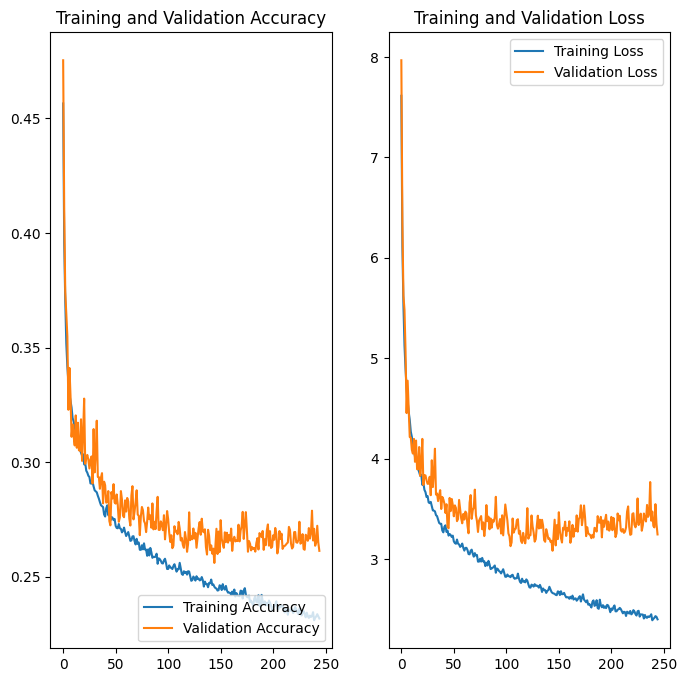

In [40]:
acc = history.history['mean_metric']
val_acc = history.history['val_mean_metric']

loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs_range = range(val_epochs)
epochs_range = range(245)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

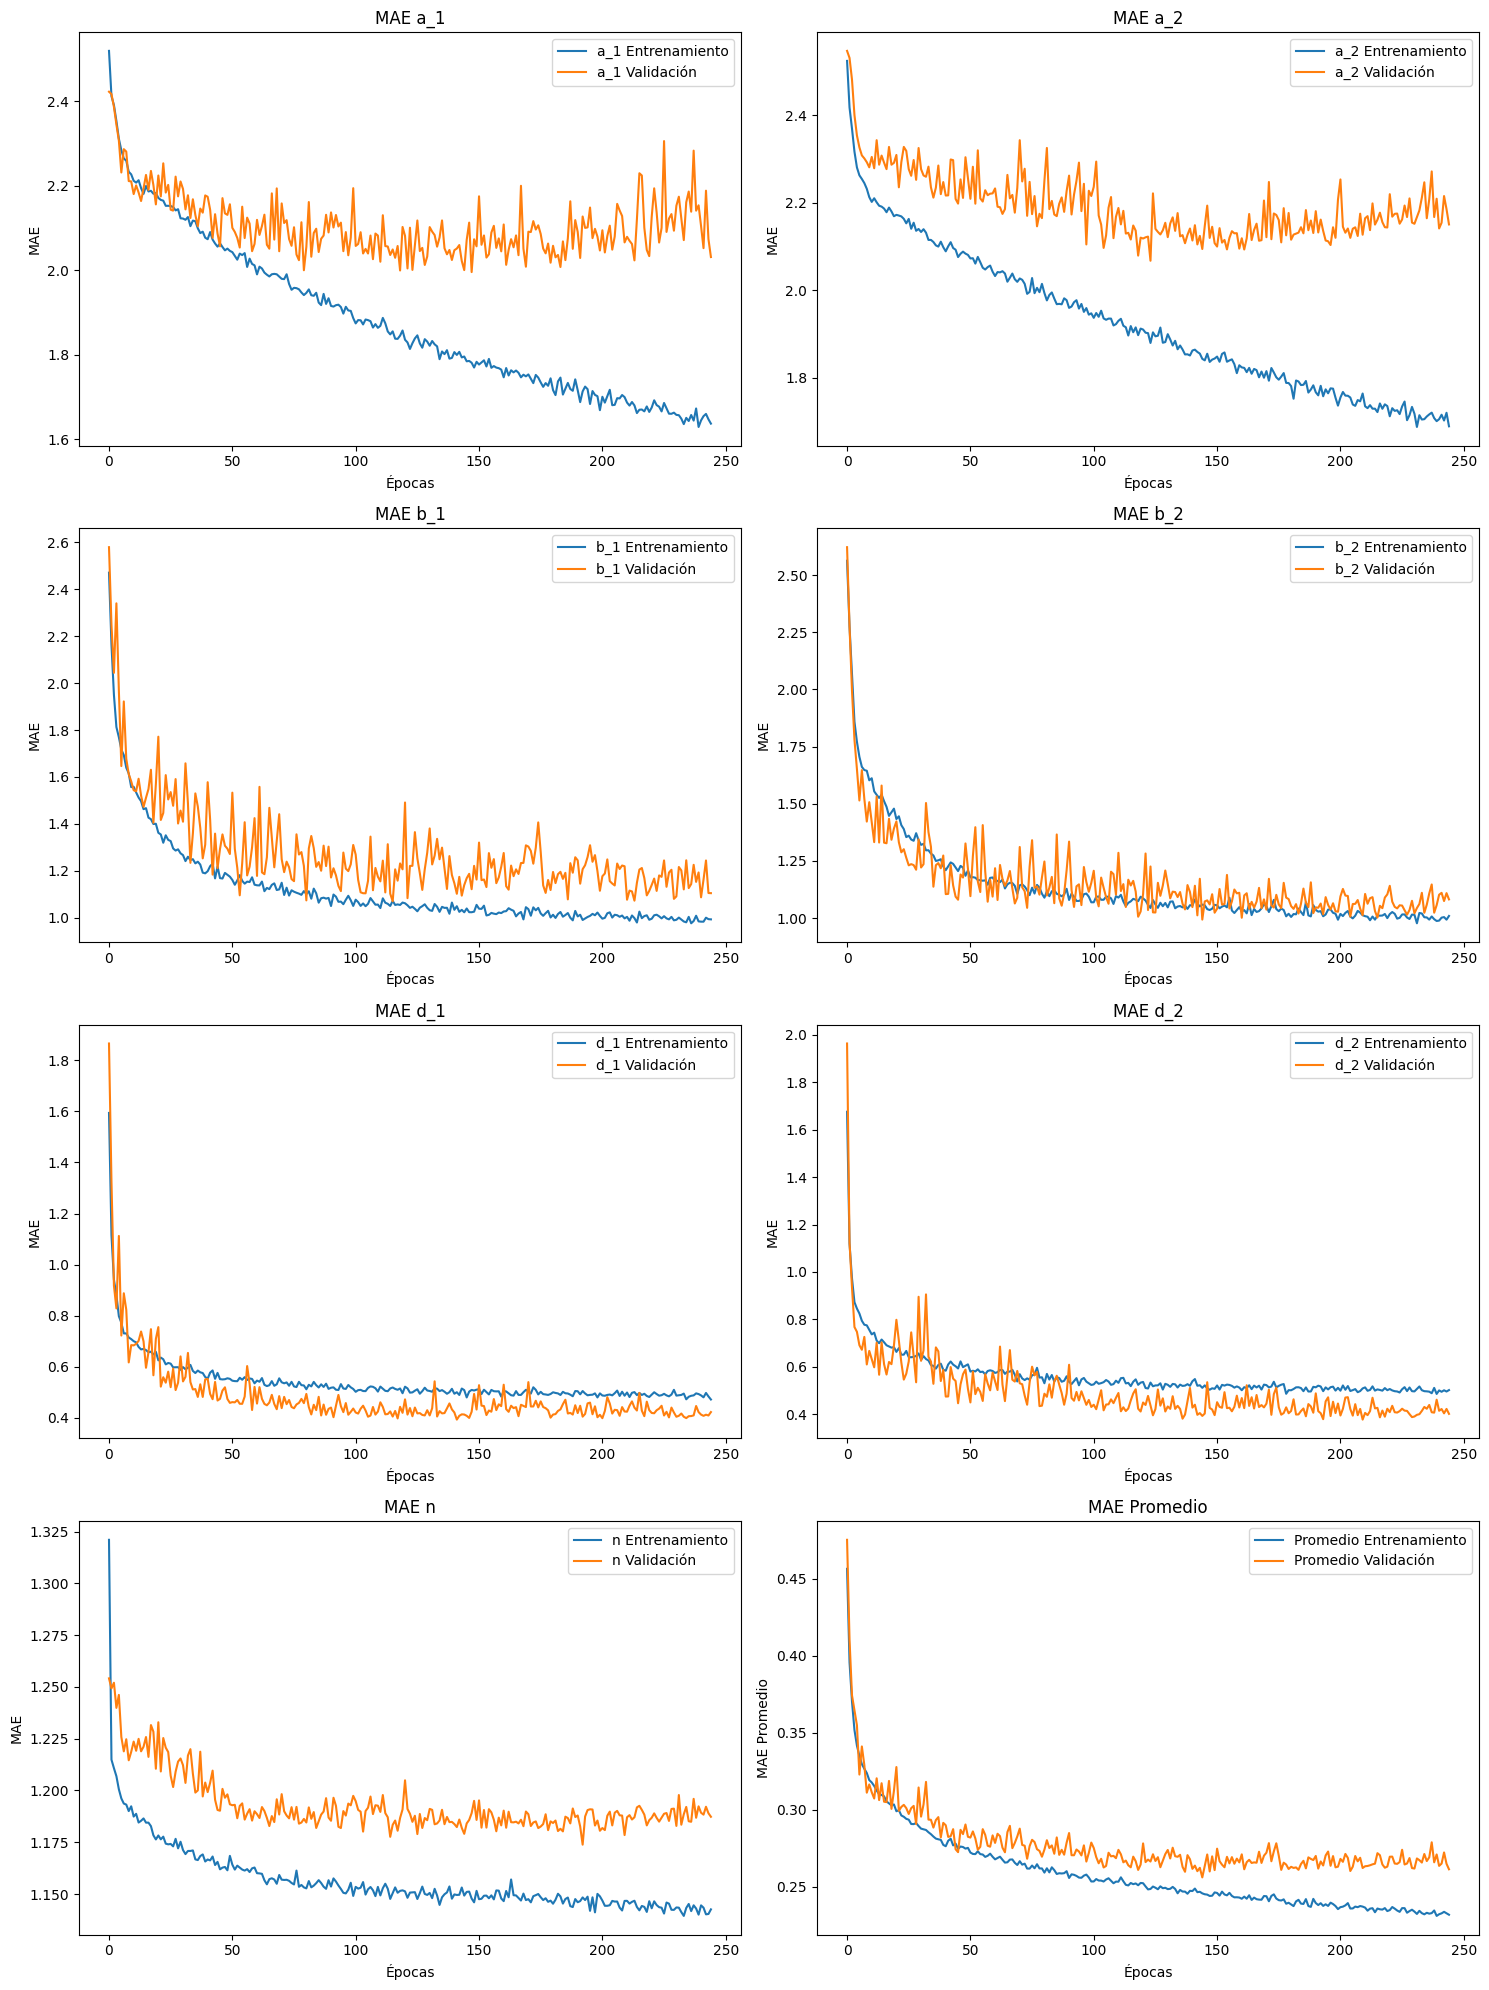

In [41]:
# Número de coeficientes más uno para la métrica adicional
n_coef = len(coeficientesnombres) + 1

# Número de filas y columnas para los subplots
n_rows = (n_coef + 1) // 2
n_cols = 2

# Crear una figura más grande para acomodar todos los subplots
plt.figure(figsize=(15, 5 * n_rows))

# Crear un subplot para cada coeficiente
for i, name in enumerate(coeficientesnombres):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(history.history[name ], label=name + ' Entrenamiento')
    plt.plot(history.history['val_' + name ], label=name + ' Validación')
    plt.title('MAE ' + name)
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()

# Agregar un subplot para la métrica prom_per
plt.subplot(n_rows, n_cols, n_coef)
plt.plot(history.history['mean_metric'], label='Promedio Entrenamiento')
plt.plot(history.history['val_mean_metric'], label='Promedio Validación')
plt.title('MAE Promedio')
plt.xlabel('Épocas')
plt.ylabel('MAE Promedio')
plt.legend()

# Ajustar el diseño para asegurarse de que todo encaje bien
plt.tight_layout()
plt.show()

# Evaluamos el modelo

In [42]:
test_loss, test_a1, test_a2, test_b1, test_b2, test_d1, test_d2, test_n, testprom_per = model.evaluate(
    varftest, coefvarftest)

63/63 [==============================] - 0s 1ms/step - loss: 3.1653 - a_1: 2.0669 - a_2: 2.1003 - b_1: 1.1591 - b_2: 1.0345 - d_1: 0.4139 - d_2: 0.4232 - n: 1.1563 - mean_metric: 0.2605


In [43]:
predictions = model.predict(varftest)

63/63 [==============================] - 0s 723us/step


In [44]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calcula el MAE
mae = mean_absolute_error(coefvarftest, predictions)

# Calcula la desviación estándar del error
error = coefvarftest - predictions
std_dev = np.std(error)

# Calcula el error absoluto máximo
max_error = np.max(np.abs(error))

print(f"MAE: {mae}, Desviación estándar del error: {std_dev}, Error absoluto máximo: {max_error}")

MAE: 1.1933006329073437, Desviación estándar del error: 1.6787517630368798, Error absoluto máximo: 7.644713401794434


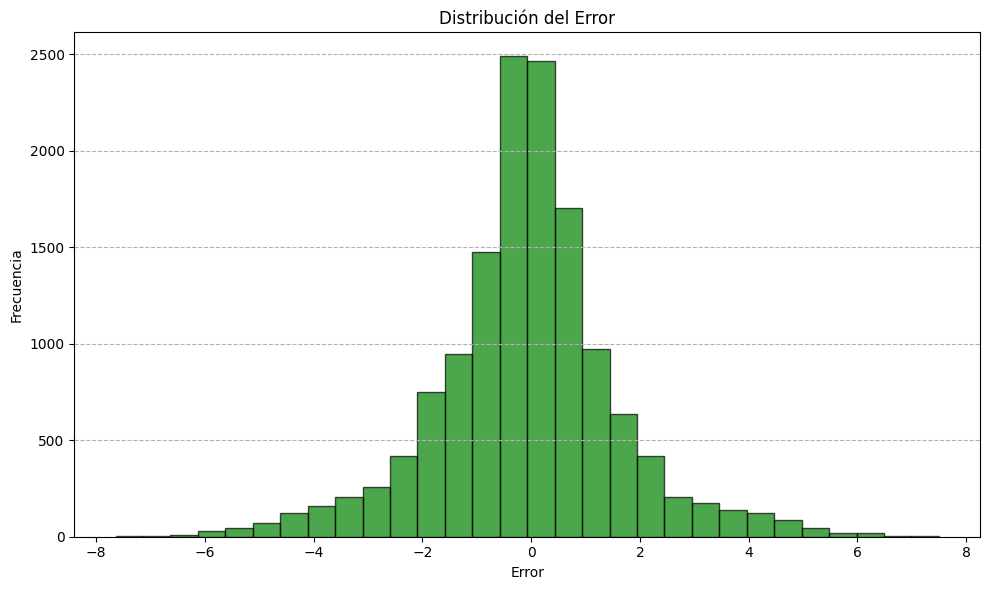

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Establece el tamaño del gráfico
plt.hist(error.flatten(), bins=30, edgecolor='black', alpha=0.7, color = 'green')  # Añade bordes negros a las barras y ajusta la transparencia
plt.title('Distribución del Error')  # Añade un título al gráfico
plt.xlabel('Error')  # Etiqueta el eje x
plt.ylabel('Frecuencia')  # Etiqueta el eje y
plt.grid(axis='y', linestyle='--')  # Añade una cuadrícula horizontal
plt.tight_layout()  # Ajusta el diseño para evitar que se recorten las etiquetas
plt.show()

In [46]:
# Calcula el error absoluto para cada dato
absolute_error = np.abs(coefvarftest - predictions)

# Calcula el error para cada dato
error = coefvarftest - predictions

# Calcula la suma de los valores reales para cada dato
sum_real_values = np.sum(coefvarftest, axis=-1)

# Divide el error absoluto por la suma de los valores reales para cada dato
relative_error_per_data = np.sum(absolute_error, axis=-1) / sum_real_values

# Calcula el MAE relativo como la media de los errores relativos
relative_mae = np.mean(relative_error_per_data)

# Divide el error por la suma de los valores reales para cada dato
relative_error_per_data_std_max = np.sum(error, axis=-1) / sum_real_values

# Calcula la desviación estándar del error relativo
relative_std_dev = np.std(relative_error_per_data_std_max)

# Calcula el error absoluto máximo relativo
relative_max_error = np.max(np.abs(relative_error_per_data_std_max))

print(f"MAE relativo: {relative_mae}")
print(f"Desviación estándar del error relativo: {relative_std_dev}")
print(f"Error absoluto máximo relativo: {relative_max_error}")

MAE relativo: 0.26254106213495865
Desviación estándar del error relativo: 0.15069677430562028
Error absoluto máximo relativo: 1.4417104522387187


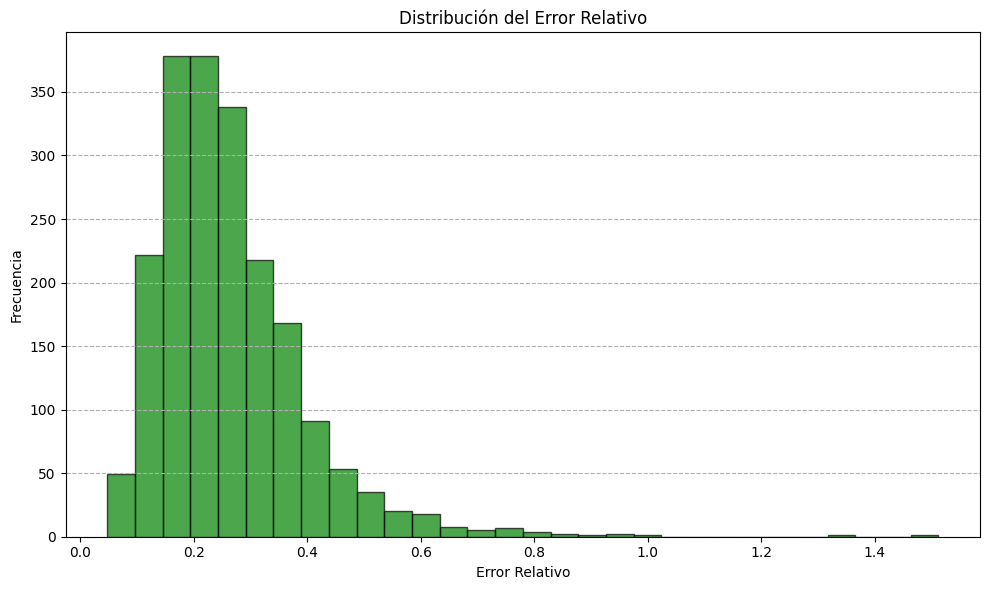

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Establece el tamaño del gráfico
plt.hist(relative_error_per_data, bins=30, edgecolor='black', alpha=0.7, color = 'green')  # Añade bordes negros a las barras y ajusta la transparencia
plt.title('Distribución del Error Relativo')  # Añade un título al gráfico
plt.xlabel('Error Relativo')  # Etiqueta el eje x
plt.ylabel('Frecuencia')      # Etiqueta el eje y
plt.grid(axis='y', linestyle='--')  # Añade una cuadrícula horizontal
plt.tight_layout()  # Ajusta el diseño para evitar que se recorten las etiquetas
plt.show()

# Guardamos los datos de Accuracy y Loss

In [48]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../../Gráficas finales con ruido/History 100,200/historytrayec200.csv', index=False)

# Guardamos el modelo

In [49]:
path_to_save = '../../../Modelos con ruido/Modelos 100,200'

In [50]:
model.save(path_to_save + '/trayectorias200.h5')

# Importamos el modelo

In [2]:
def custom_activation(x):
    return 10 * tf.nn.sigmoid(x)

In [3]:
coeficientesnombres = ('a_1', 'a_2', 'b_1', 'b_2', 'd_1', 'd_2', 'n')

def mse_component(i):
    def mse_i(y_true, y_pred):
        return tf.keras.losses.mean_absolute_error(y_true[:, i], y_pred[:, i])

    mse_i.__name__ = coeficientesnombres[i]
    return mse_i

def mean_metric(y_true, y_pred):
    total_loss = 0
    for i in range(7):
        total_loss += mse_component(i)(y_true, y_pred)
    sum_of_true_coefficients = tf.reduce_sum(y_true, axis=-1)
    return total_loss / sum_of_true_coefficients

metrics = [mse_component(i) for i in range(7)] + [mean_metric]

In [4]:
import keras
import tensorflow as tf
# Creación de un diccionario con todas las métricas personalizadas
custom_objects = {'custom_activation':custom_activation,'mean_metric': mean_metric}
for i in range(7):
    custom_objects[coeficientesnombres[i]] = mse_component(i)
new_model = keras.models.load_model('../../../Modelos/Modelos 100,200/trayectorias200.h5', custom_objects=custom_objects)

# Probamos el modelo con datos nuevos

## Creamos nuevos datos

In [54]:
import random
from scipy.integrate import solve_ivp
condini = []
varf = []
coef = []
contador = 0
T = 5
t_span = [0,5]
dt = 0.025
N = int(T/dt)

for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 200)
    
    varfci2 = []
    for i_ci in range(10):
        # Definimos las condiciones iniciales
        X = np.zeros(N)
        Y = np.zeros(N)
        X[0] = random.randint(0, 10)
        Y[0] = random.randint(0, 10)
        y0 = np.array([X[0], Y[0]])
        condini.append(y0)

        # Simulación con ruido
        for i in range(N-1):
            noise1 = np.random.normal(0, .5)
            noise2 = np.random.normal(0, .5)

            X[i+1] = X[i] + (a1/(1+Y[i]**n) - d1*X[i] + b1)*dt + noise1*np.sqrt(dt)
            Y[i+1] = Y[i] + (a2/(1+X[i]**n) - d2*Y[i] + b2)*dt + noise2*np.sqrt(dt)


        varfci = np.append([X], [Y], axis=0)
        varfci2.append(varfci)

       

    varf= varfci2
    print('--------------------------------------------')
    print(coef1)
    print(np.shape(varf))
varf = np.array(varf)
coef = np.array(coef)

--------------------------------------------
[9, 2, 4, 0, 2, 9, 1]
(10, 2, 200)


In [55]:
varfnone = varf[None, :]

## Predecimos con los datos nuevos

In [56]:
new_predictions = new_model.predict(varfnone)
new_predictions = np.round(new_predictions)
new_predictions = np.clip(new_predictions, 0, None)
print(new_predictions)

1/1 [==============================] - 0s 61ms/step
[[7. 5. 5. 1. 2. 9. 4.]]


## Graficamos con los coeficientes reales

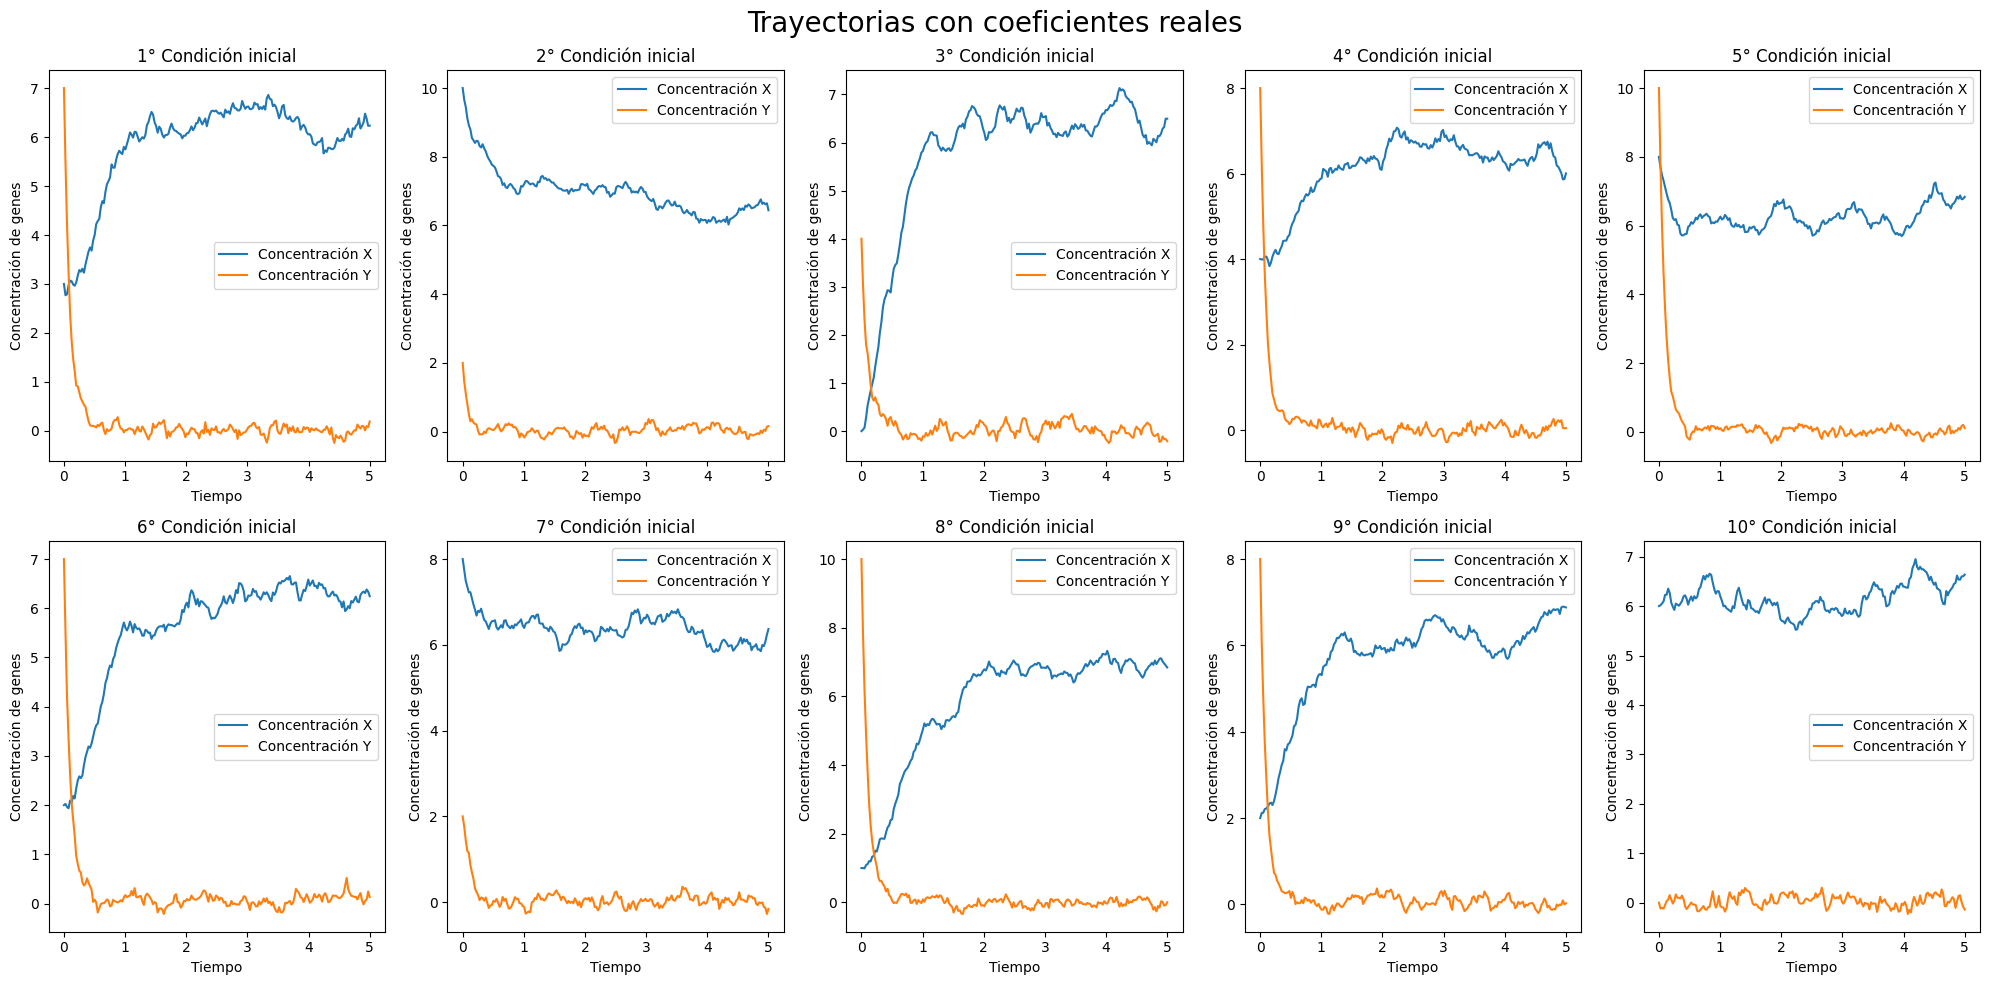

In [57]:
import matplotlib.pyplot as plt

t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 5 filas de gráficos, 2 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos

for i in range(10):
    axes[i].plot(times, np.array(varf)[i, 0, :], label=f"Concentración X")
    axes[i].plot(times,np.array(varf)[i,1,:], label=f"Concentración Y")
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Concentración de genes')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Trayectorias con coeficientes reales', fontsize=20)  # Título general para todas las subfiguras

plt.tight_layout()  # esto ayuda a que los gráficos no se superpongan
plt.show()

## Graficamos con los coeficientes predecidos

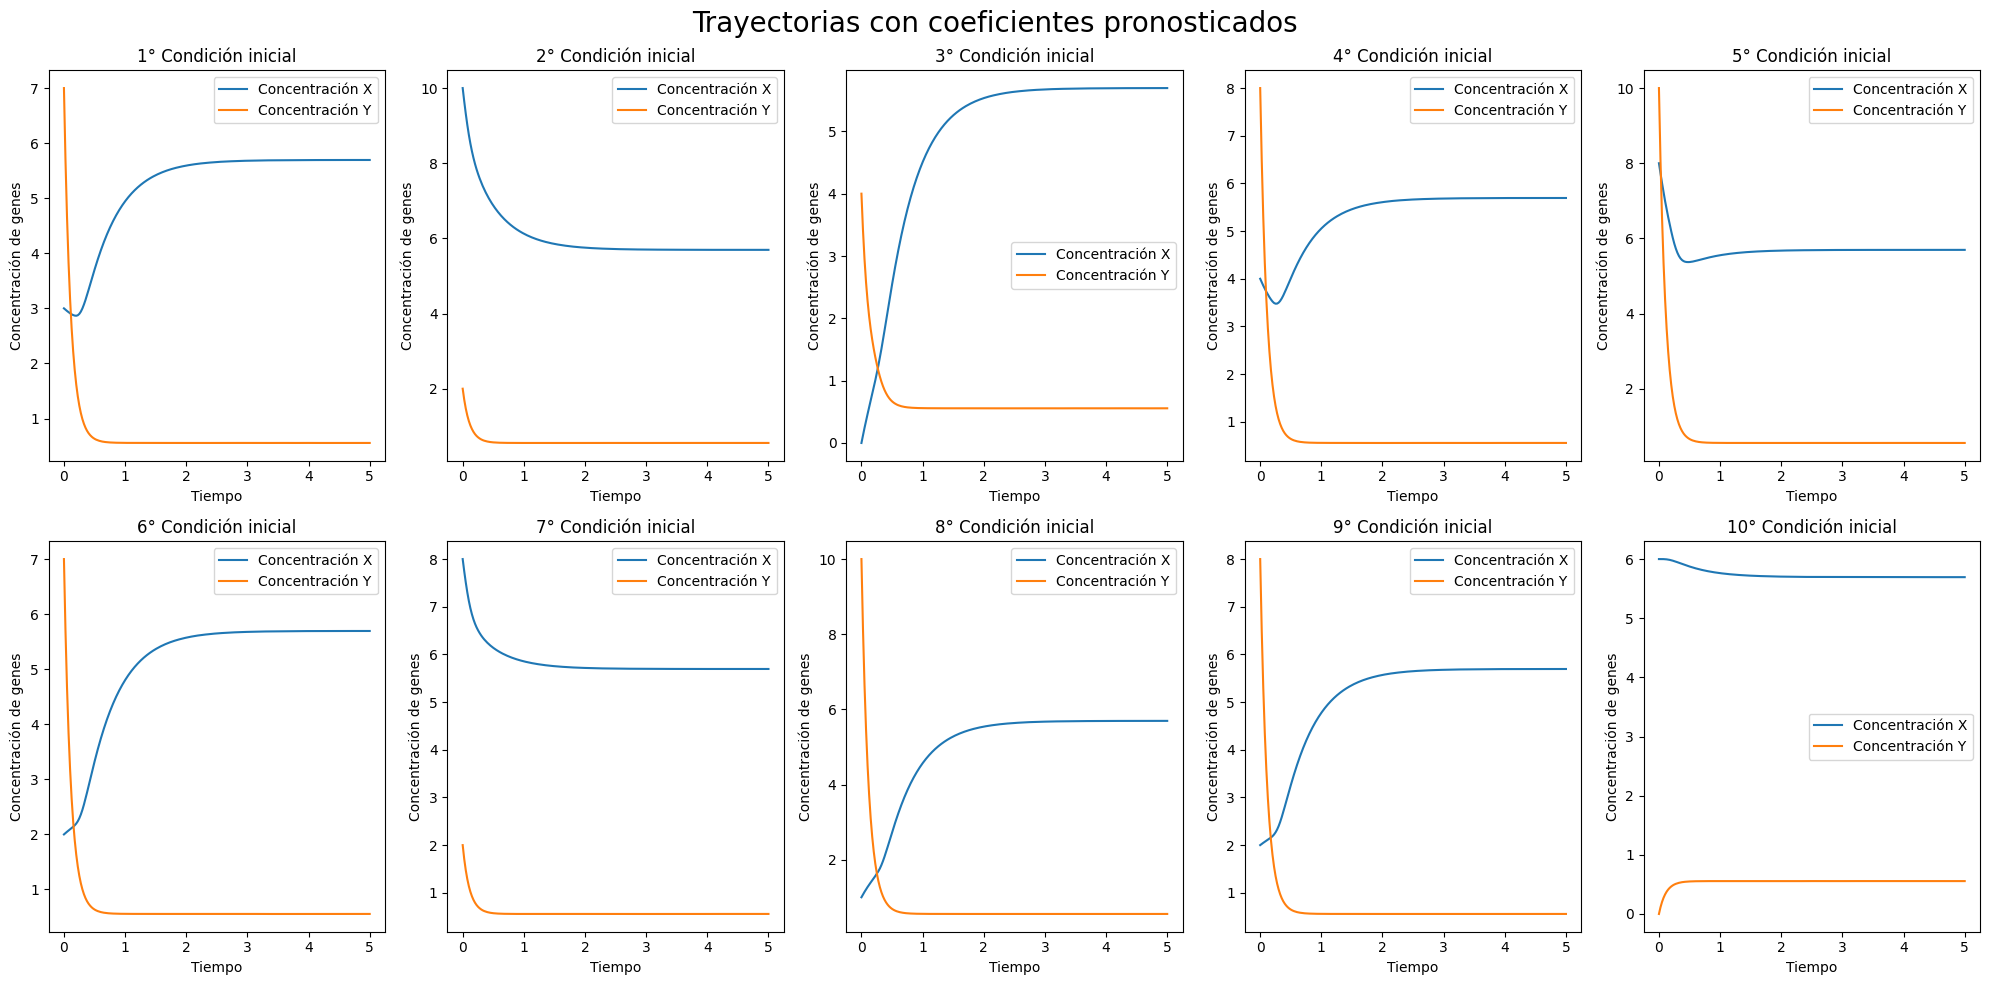

In [58]:
a1 = new_predictions[0,0]
a2 = new_predictions[0,1]
b1 = new_predictions[0,2]
b2 = new_predictions[0,3]
d1 = new_predictions[0,4]
d2 = new_predictions[0,5]
n = new_predictions[0,6]

varfpred = []

def f(t, y):

    # asignar a cada ODE a un elemento de vector
    X = y[0]
    Y = y[1]

    # definimos cada ODE
    dX_dt = a1/(1+Y**n)-d1*X+b1
    dY_dt = a2/(1+X**n)-d2*Y+b1

    return [dX_dt, dY_dt]

# Declaramos el vector de tiempo
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
varfci2pred = []

for i_ci in range(0, 10):
# Definimos las condiciones iniciales
    y0 = condini[i_ci]
    # Resolvemos
    sol = solve_ivp(f, t_span, y0, t_eval=times)
    tiempo = sol.t
    var1pred = sol.y[0]
    var2pred = sol.y[1]
    varfcipred = np.append([var1pred], [var2pred], axis=0)
    varfci2pred.append(varfcipred)
    
varfpred= varfci2pred

fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 5 filas de gráficos, 2 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos
# Graficamos
for i in range(10):
    axes[i].plot(times, np.array(varfpred)[i, 0, :], label=f"Concentración X")
    axes[i].plot(times,np.array(varfpred)[i,1,:], label=f"Concentración Y")
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Concentración de genes')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Trayectorias con coeficientes pronosticados', fontsize=20)  # Título general para todas las subfiguras

plt.tight_layout()  
plt.show()

## Graficamos ambos

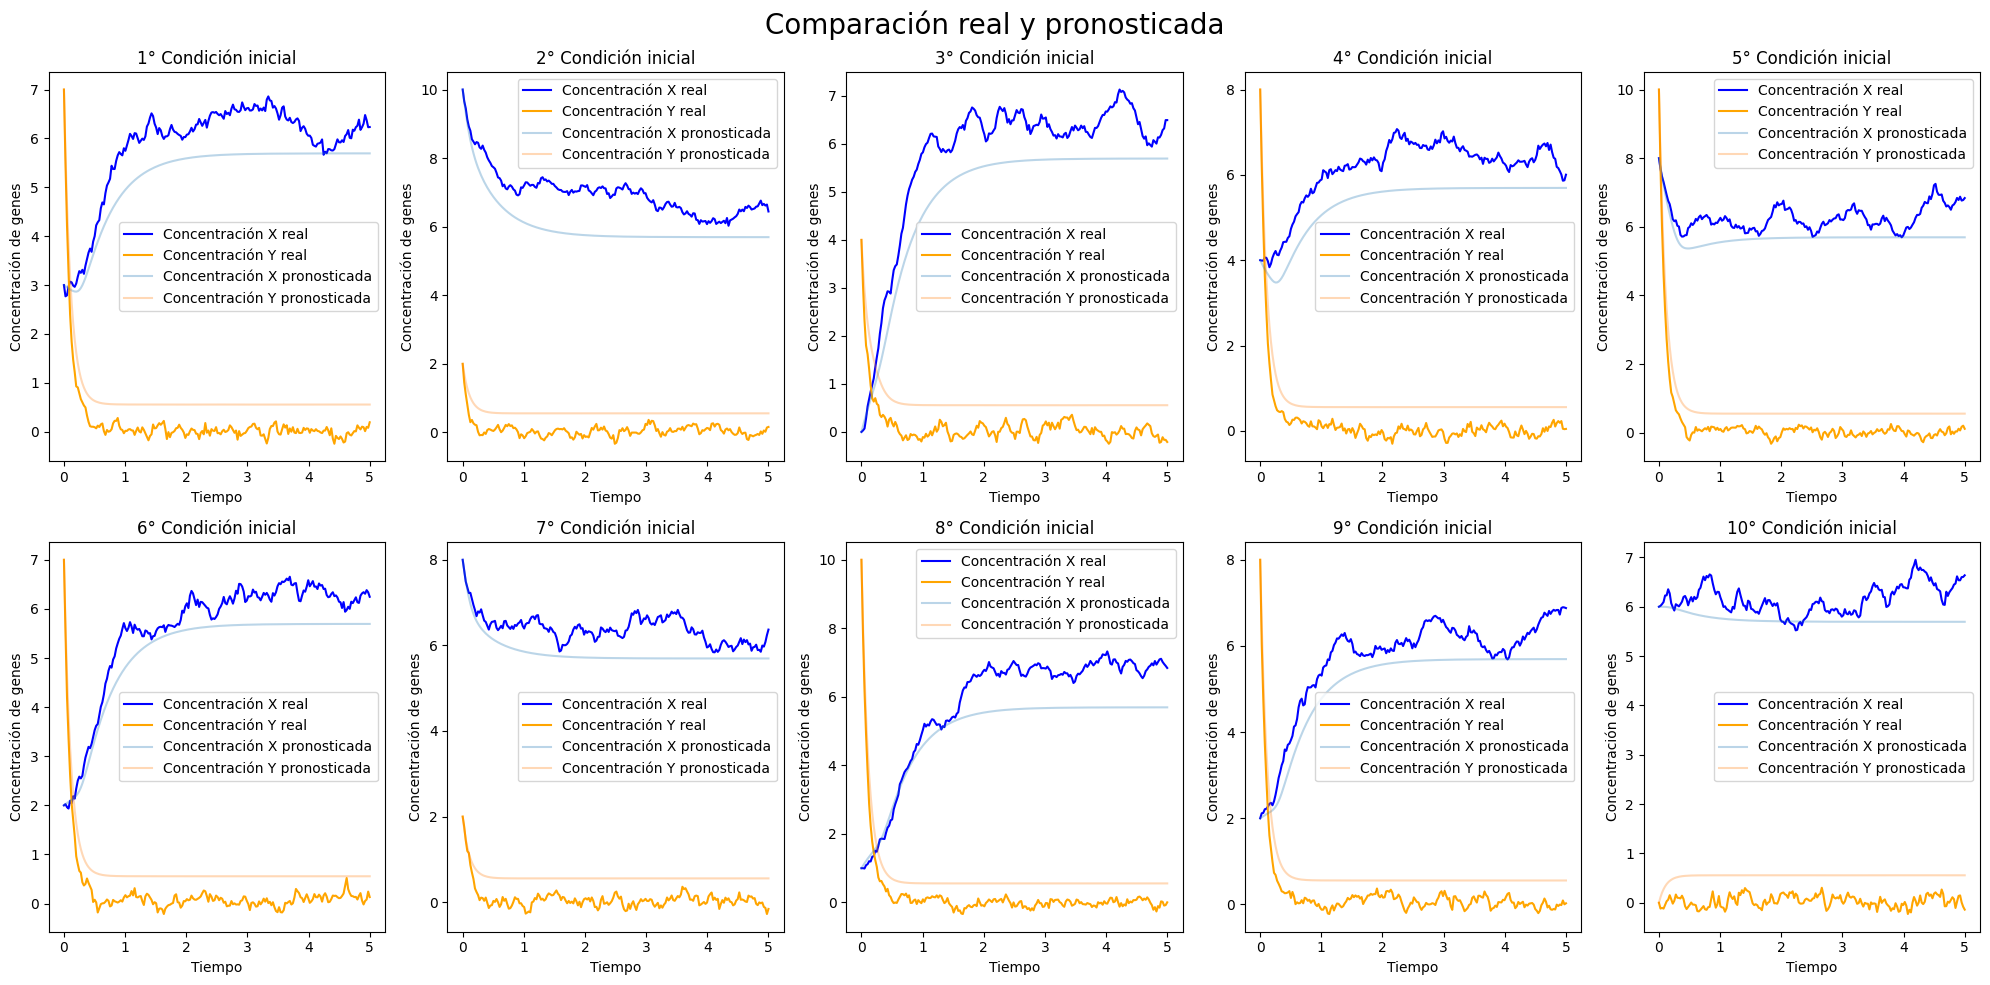

In [59]:
%matplotlib inline
#%matplotlib qt
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 filas de gráficos, 5 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos

for i in range(10):
    # varf
    axes[i].plot(times, np.array(varf)[i, 0, :], label=f"Concentración X real", alpha=1, color = 'blue')
    axes[i].plot(times,np.array(varf)[i,1,:], label=f"Concentración Y real", alpha=1, color = 'orange')

    # varfpred
    axes[i].plot(times, np.array(varfpred)[i, 0, :], label=f"Concentración X pronosticada", alpha=0.3)
    axes[i].plot(times,np.array(varfpred)[i,1,:], label=f"Concentración Y pronosticada", alpha=0.3)

    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Concentración de genes')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Comparación real y pronosticada', fontsize=20)  # Título general para todas las subfiguras

plt.tight_layout()  # esto ayuda a que los gráficos no se superpongan
plt.show()

## Graficamos las diferencias

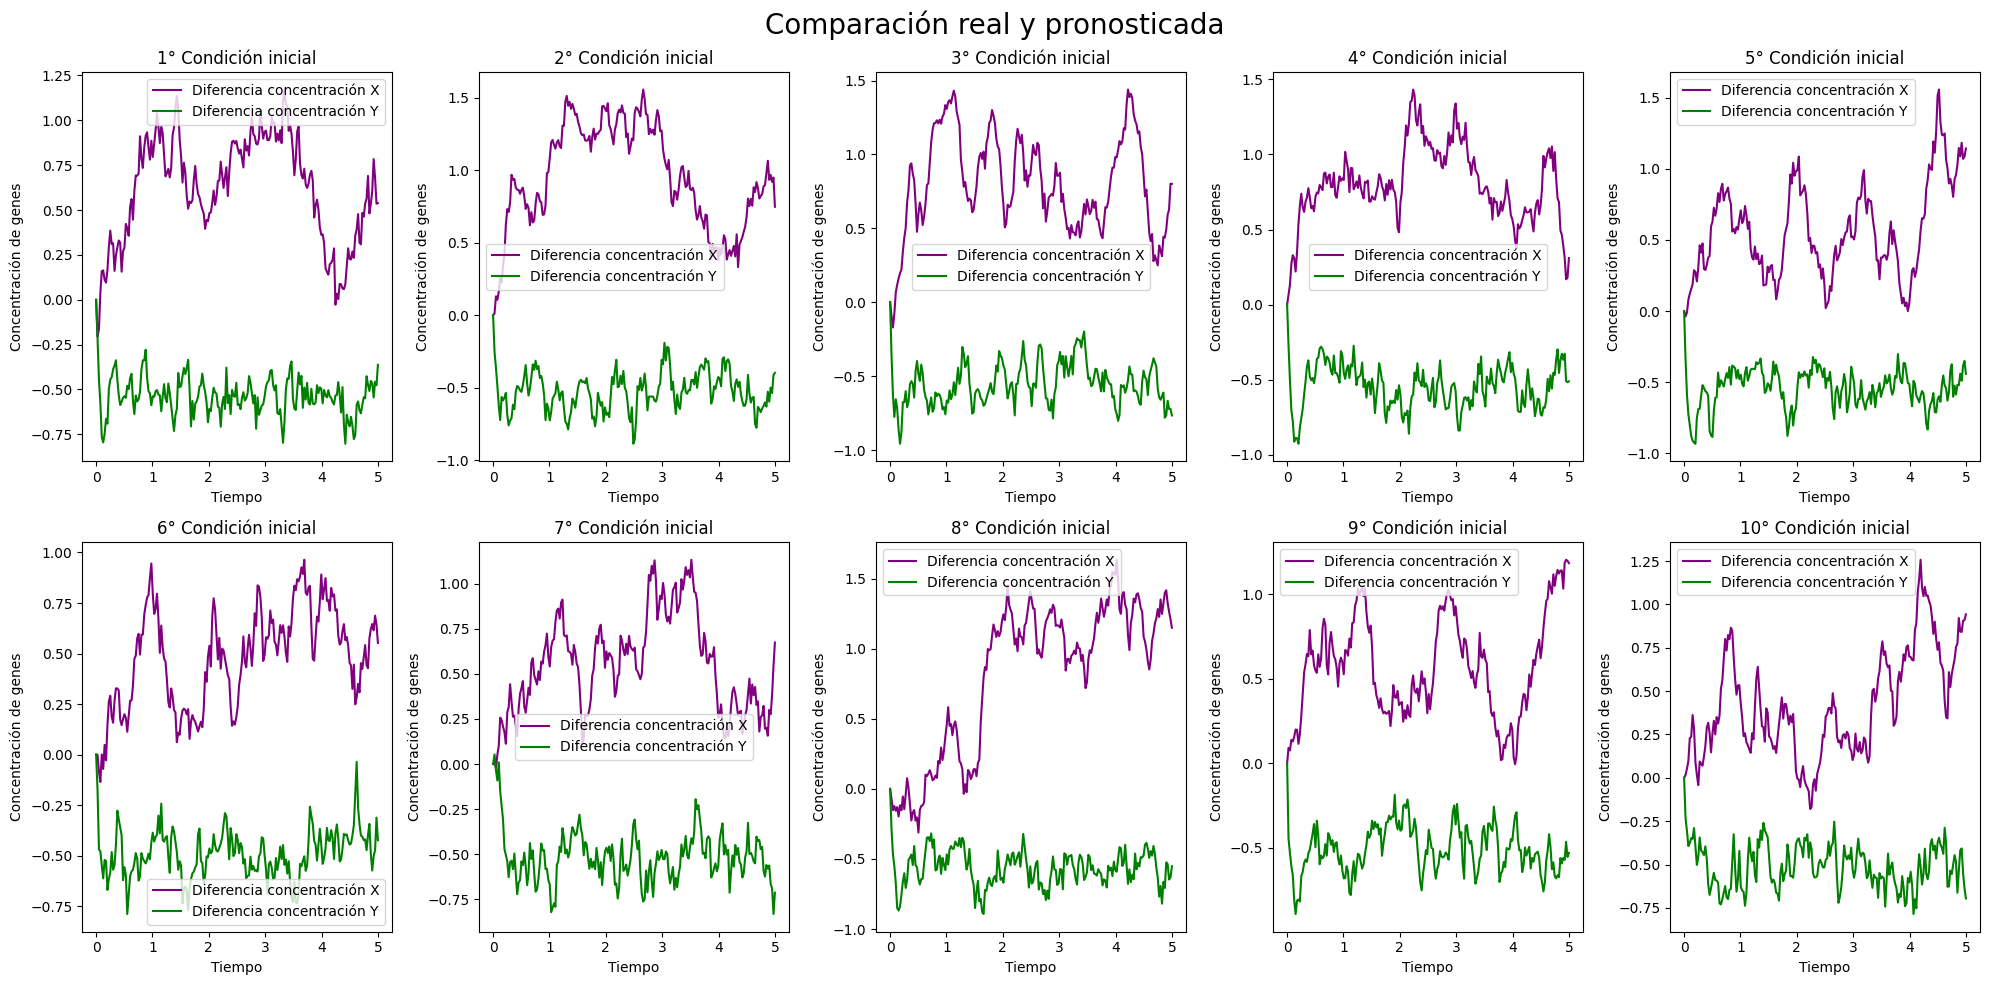

In [60]:
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 filas de gráficos, 5 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos

sum_errors_X = []
sum_errors_Y = []
for i in range(10):
    # Diferencia
    diff_X = np.array(varf)[i, 0, :] - np.array(varfpred)[i, 0, :]
    diff_Y = np.array(varf)[i, 1, :] - np.array(varfpred)[i, 1, :]
    axes[i].plot(times, diff_X, label=f"Diferencia concentración X", alpha=1, color = "purple")
    axes[i].plot(times, diff_Y, label=f"Diferencia concentración Y", alpha=1, color = "g")
    # Suma de los errores
    sum_errors_X.append(np.sum(np.abs(diff_X)))
    sum_errors_Y.append(np.sum(np.abs(diff_Y)))

    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Concentración de genes')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Comparación real y pronosticada', fontsize=20)  # Título general para todas las subfiguras

plt.tight_layout()  # esto ayuda a que los gráficos no se superpongan
plt.show()

In [61]:
print(np.sum(sum_errors_X)/2000)
print(np.sum(sum_errors_Y)/2000)

0.6608105697785668
0.5276437937169945


## Diferencias relativas

C:\Users\rafae\AppData\Local\Temp\ipykernel_436\2855101149.py:17: RuntimeWarning: invalid value encountered in true_divide
  relative_diff_X = np.where(real_X != 0, (pred_X - real_X) / real_X, 0)
C:\Users\rafae\AppData\Local\Temp\ipykernel_436\2855101149.py:18: RuntimeWarning: invalid value encountered in true_divide
  relative_diff_Y = np.where(real_Y != 0, (pred_Y - real_Y) / real_Y, 0)


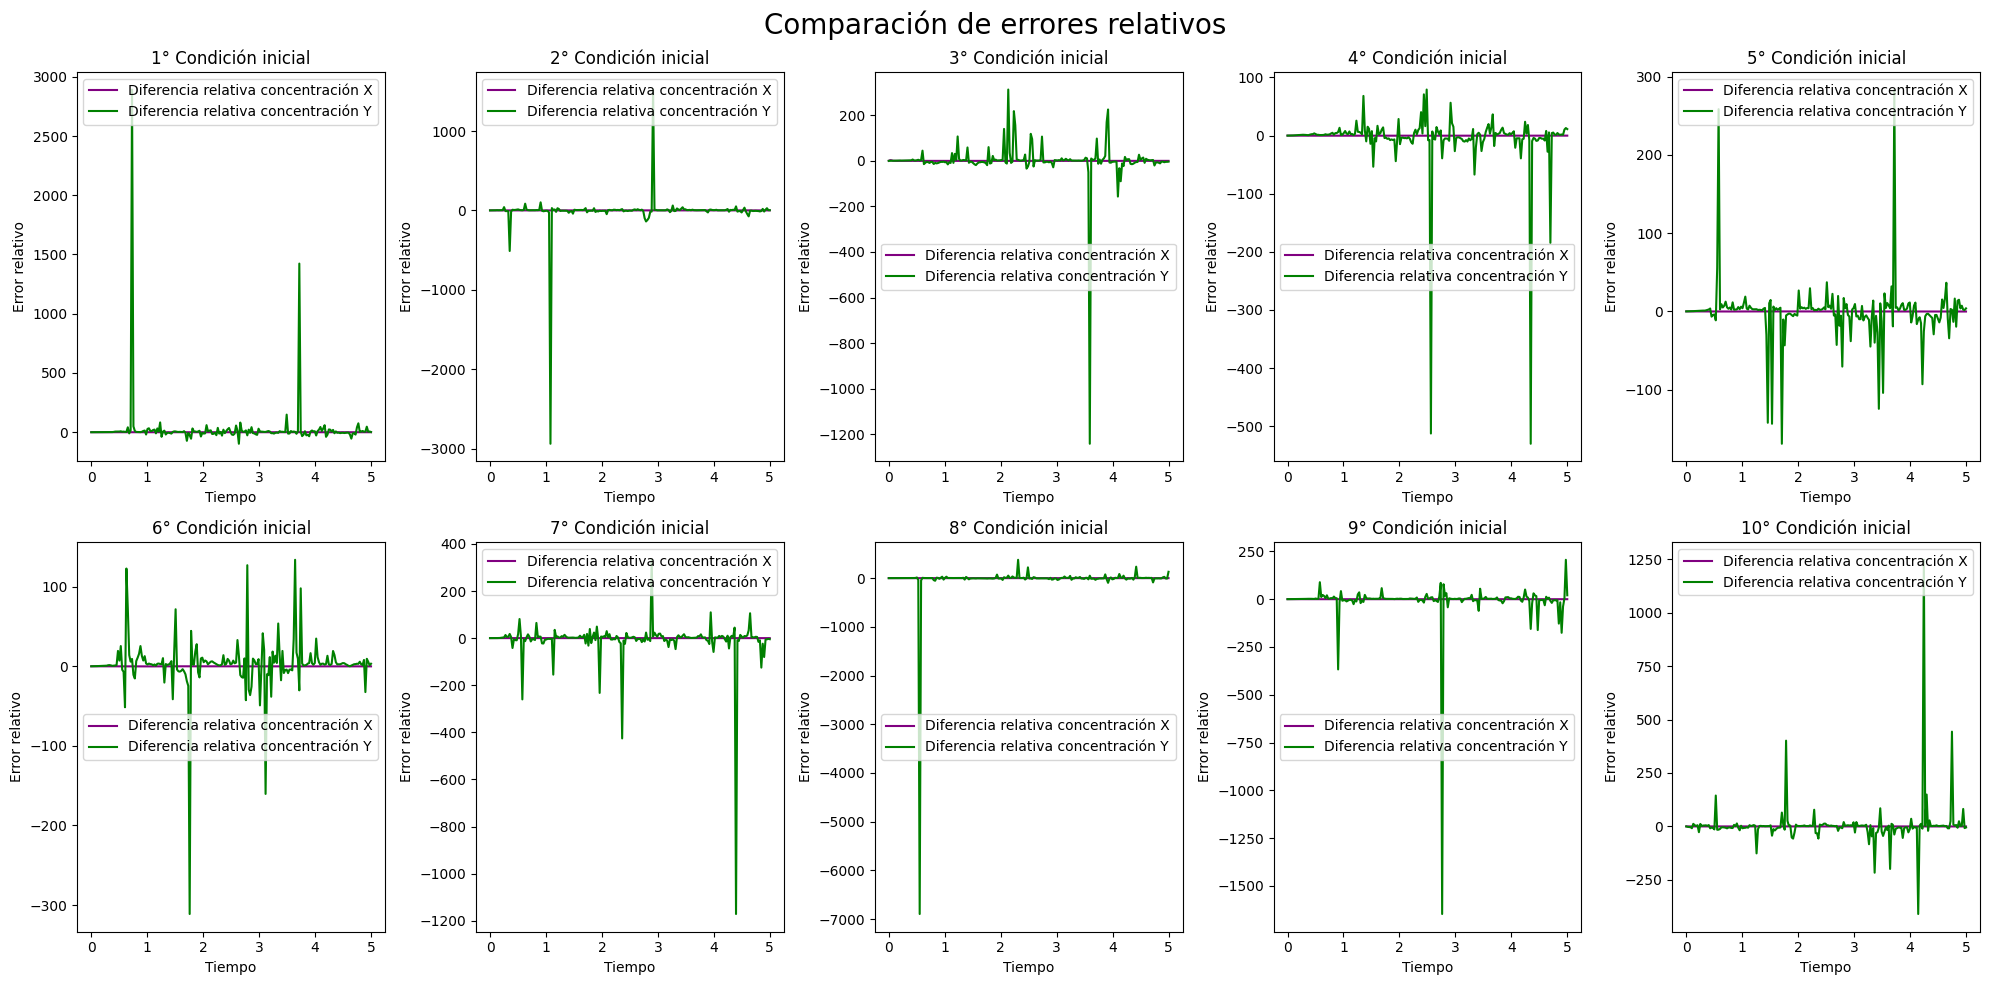

Suma mayor error relativo 10282.701564007924
Número de condición inicial 8


In [62]:
# Vamos a crear una lista para almacenar las sumas de los errores relativos para X y Y
sum_relative_errors_X = []
sum_relative_errors_Y = []

fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 filas de gráficos, 5 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos

for i in range(10):
    # Diferencia relativa
    # Asegurándonos de evitar divisiones por cero
    real_X = np.array(varf)[i, 0, :]
    real_Y = np.array(varf)[i, 1, :]
    
    pred_X = np.array(varfpred)[i, 0, :]
    pred_Y = np.array(varfpred)[i, 1, :]
    
    relative_diff_X = np.where(real_X != 0, (pred_X - real_X) / real_X, 0)
    relative_diff_Y = np.where(real_Y != 0, (pred_Y - real_Y) / real_Y, 0)
    
    axes[i].plot(times, relative_diff_X, label=f"Diferencia relativa concentración X", alpha=1, color="purple")
    axes[i].plot(times, relative_diff_Y, label=f"Diferencia relativa concentración Y", alpha=1, color="g")
    
    # Suma de los errores relativos
    sum_relative_errors_X.append(np.sum(np.abs(relative_diff_X)))
    sum_relative_errors_Y.append(np.sum(np.abs(relative_diff_Y)))

    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Error relativo')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Comparación de errores relativos', fontsize=20)

plt.tight_layout()
plt.show()

# Podrías encontrar el máximo error relativo de la misma forma que el error absoluto
sum_total_relative_errors = [ex + ey for ex, ey in zip(sum_relative_errors_X, sum_relative_errors_Y)]
max_relative_error = max(sum_total_relative_errors)
index_max_relative_error = sum_total_relative_errors.index(max_relative_error) + 1  # Sumamos 1 porque las condiciones iniciales empiezan desde 1 en tu gráfico

print('Suma mayor error relativo', max_relative_error)
print('Número de condición inicial',index_max_relative_error)

## Error relativo global

In [63]:
# Vamos a crear listas para almacenar el máximo error relativo y el tiempo en que ocurre para cada condición inicial
max_relative_errors_X = []
max_relative_errors_Y = []
times_max_error_X = []
times_max_error_Y = []

for i in range(10):
    # Calcular la diferencia relativa como antes
    real_X = np.array(varf)[i, 0, :]
    real_Y = np.array(varf)[i, 1, :]
    
    pred_X = np.array(varfpred)[i, 0, :]
    pred_Y = np.array(varfpred)[i, 1, :]
    
    relative_diff_X = np.where(real_X != 0, np.abs((pred_X - real_X) / real_X), 0)
    relative_diff_Y = np.where(real_Y != 0, np.abs((pred_Y - real_Y) / real_Y), 0)
    
    # Encontrar el valor máximo y el tiempo en el que ocurre
    max_error_X = np.max(np.abs(relative_diff_X))
    max_error_Y = np.max(np.abs(relative_diff_Y))
    time_max_error_X = times[np.argmax(relative_diff_X)]
    time_max_error_Y = times[np.argmax(relative_diff_Y)]
    
    max_relative_errors_X.append(max_error_X)
    max_relative_errors_Y.append(max_error_Y)
    times_max_error_X.append(time_max_error_X)
    times_max_error_Y.append(time_max_error_Y)

# Ahora puedes encontrar el error relativo máximo global y la condición inicial y tiempo en el que ocurre
global_max_error_X = max(max_relative_errors_X)
global_max_error_Y = max(max_relative_errors_Y)

index_global_max_error_X = max_relative_errors_X.index(global_max_error_X) + 1  # Sumamos 1 porque las condiciones iniciales empiezan desde 1 en tu gráfico
index_global_max_error_Y = max_relative_errors_Y.index(global_max_error_Y) + 1

time_global_max_error_X = times_max_error_X[index_global_max_error_X - 1]  # Restamos 1 para ajustar el índice a la lista de Python
time_global_max_error_Y = times_max_error_Y[index_global_max_error_Y - 1]

print(f"El error relativo máximo para X es {global_max_error_X*100:.2f}%")
print("Ocurre en la condición inicial número:", index_global_max_error_X)
print("Ocurre en el tiempo:", time_global_max_error_X)

print(f"El error relativo máximo para Y es {global_max_error_Y*100:.2f}%")
print("Ocurre en la condición inicial número:", index_global_max_error_Y)
print("Ocurre en el tiempo:", time_global_max_error_Y)

El error relativo máximo para X es 306.87%
Ocurre en la condición inicial número: 3
Ocurre en el tiempo: 0.02512562814070352
El error relativo máximo para Y es 689571.49%
Ocurre en la condición inicial número: 8
Ocurre en el tiempo: 0.5527638190954774


C:\Users\rafae\AppData\Local\Temp\ipykernel_436\2700797786.py:15: RuntimeWarning: invalid value encountered in true_divide
  relative_diff_X = np.where(real_X != 0, np.abs((pred_X - real_X) / real_X), 0)
C:\Users\rafae\AppData\Local\Temp\ipykernel_436\2700797786.py:16: RuntimeWarning: invalid value encountered in true_divide
  relative_diff_Y = np.where(real_Y != 0, np.abs((pred_Y - real_Y) / real_Y), 0)


In [64]:

# Vamos a crear una lista para almacenar el máximo error relativo combinado (X + Y) y los tiempos en los que ocurre para cada condición inicial
max_combined_relative_errors = []
times_max_combined_error = []

for i in range(10):
    # Calcular la diferencia relativa como antes
    real_X = np.array(varf)[i, 0, :]
    real_Y = np.array(varf)[i, 1, :]
    
    pred_X = np.array(varfpred)[i, 0, :]
    pred_Y = np.array(varfpred)[i, 1, :]
    
    relative_diff_X = np.where(real_X != 0, np.abs((pred_X - real_X) / real_X), 0)
    relative_diff_Y = np.where(real_Y != 0, np.abs((pred_Y - real_Y) / real_Y), 0)
    
    # Calculamos la suma de los errores relativos en X y Y para cada punto en el tiempo
    combined_relative_error = relative_diff_X + relative_diff_Y
    
    # Encontramos el valor máximo y el tiempo en el que ocurre
    max_combined_error = np.max(combined_relative_error)
    time_max_combined_error = times[np.argmax(combined_relative_error)]
    
    max_combined_relative_errors.append(max_combined_error)
    times_max_combined_error.append(time_max_combined_error)

# Ahora puedes encontrar el error relativo combinado máximo global y la condición inicial y tiempo en que ocurre
global_max_combined_error = max(max_combined_relative_errors)
index_global_max_combined_error = max_combined_relative_errors.index(global_max_combined_error) + 1  # Sumamos 1 porque las condiciones iniciales empiezan desde 1 en tu gráfico
time_global_max_combined_error = times_max_combined_error[index_global_max_combined_error - 1]  # Restamos 1 para ajustar el índice a la lista de Python

print(f"El error relativo combinado máximo (X + Y) es {global_max_combined_error*100:.2f}%")
print("Ocurre en la condición inicial número:", index_global_max_combined_error)
print("Ocurre en el tiempo:", time_global_max_combined_error)

El error relativo combinado máximo (X + Y) es 689575.72%
Ocurre en la condición inicial número: 8
Ocurre en el tiempo: 0.5527638190954774


C:\Users\rafae\AppData\Local\Temp\ipykernel_436\2532752332.py:13: RuntimeWarning: invalid value encountered in true_divide
  relative_diff_X = np.where(real_X != 0, np.abs((pred_X - real_X) / real_X), 0)
C:\Users\rafae\AppData\Local\Temp\ipykernel_436\2532752332.py:14: RuntimeWarning: invalid value encountered in true_divide
  relative_diff_Y = np.where(real_Y != 0, np.abs((pred_Y - real_Y) / real_Y), 0)


## Hacemos esto n veces

In [5]:
# Importando las librerías necesarias
import numpy as np
import random
from scipy.integrate import solve_ivp


todas_diferencias_relativas_X = []
todas_diferencias_relativas_Y = []

# Inicializar las variables para almacenar los errores relativos máximos globales y los coeficientes correspondientes
max_global_error_X = 0
max_global_error_Y = 0
coef_max_error_X = None
coef_max_error_Y = None
coef_max_error_X_pred = None
coef_max_error_Y_pred = None
condinimaxX = None
condinimaxY = None

total_elementos_X = 0
elementos_condicion_X = 0

total_elementos_Y = 0
elementos_condicion_Y = 0

condini = []
varf = []
coef = []
contador = 0
T = 5
t_span = [0,5]
dt = 0.025
N = int(T/dt)

# Realizamos 10 iteraciones
for iteration in range(1000):
    condini = []
    varf = []
    coef = []
    # constantes
    a1 = random.randint(1, 10)
    a2 = random.randint(1, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(1, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def ftrue(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b2

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 100)
    
    varfci2 = []
    for i_ci in range(0, 10):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])
        condini.append(y0)
        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(ftrue, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        varfcitrue = np.append([var1], [var2], axis=0)
        varfci2.append(varfcitrue)    

    varftrue= varfci2
    varftrue = np.array(varftrue)
    print(coef)
    
    varfci2 = []
    for i_ci in range(10):
        # Definimos las condiciones iniciales
        X = np.zeros(N)
        Y = np.zeros(N)
        X[0] = random.randint(0, 10)
        Y[0] = random.randint(0, 10)
        y0 = np.array([X[0], Y[0]])
        condini.append(y0)

        # Simulación con ruido
        for i in range(N-1):
            noise1 = np.random.normal(0, .5)
            noise2 = np.random.normal(0, .5)

            X[i+1] = X[i] + (a1/(1+Y[i]**n) - d1*X[i] + b1)*dt + noise1*np.sqrt(dt)
            Y[i+1] = Y[i] + (a2/(1+X[i]**n) - d2*Y[i] + b2)*dt + noise2*np.sqrt(dt)


        varfci = np.append([X], [Y], axis=0)
        varfci2.append(varfci)
    
    varf= varfci2
    varf = np.array(varf)

    
    varfnone = varf[None, :]
    new_predictions = new_model.predict(varfnone)
    new_predictions = np.round(new_predictions)
    print(new_predictions)  

    a1pred = new_predictions[0,0]
    a2pred = new_predictions[0,1]
    b1pred = new_predictions[0,2]
    b2pred = new_predictions[0,3]
    d1pred = new_predictions[0,4]
    d2pred = new_predictions[0,5]
    npred = new_predictions[0,6]
    
    # Verificar si a1pred, a2pred, o npred son iguales a cero
    if a1pred == 0 or a2pred == 0 or npred == 0:
        print("Uno de los coeficientes críticos es cero, saltando esta iteración.")
        continue  # Salta al inicio del bucle for para la próxima iteración

    varfpred = []

    def f_pred(t, y):
        X = y[0]
        Y = y[1]
        dX_dt = a1pred / (1 + Y ** npred) - d1pred * X + b1pred
        dY_dt = a2pred / (1 + X ** npred) - d2pred * Y + b2pred
        return [dX_dt, dY_dt]

    varfci2pred = []
    for i_ci in range(10):
        y0 = condini[i_ci]
        sol = solve_ivp(f_pred, t_span, y0, t_eval=times)
        var1pred = sol.y[0]
        var2pred = sol.y[1]
        varfcipred = np.append([var1pred], [var2pred], axis=0)
        varfci2pred.append(varfcipred)
    varfpred = varfci2pred

    # Inicializar listas para almacenar los errores relativos máximos y medios para todas las iteraciones
    todos_errores_maximos_X = []
    todos_errores_maximos_Y = []
    todos_errores_medios_X = []
    todos_errores_medios_Y = []
    
   # Calcular las diferencias relativas para cada conjunto de condiciones iniciales
    for i in range(10):  # Asumiendo que hay 10 condiciones iniciales
        real_X = np.array(varftrue)[i, 0, :]
        real_Y = np.array(varftrue)[i, 1, :]
        pred_X = np.array(varfpred)[i, 0, :]
        pred_Y = np.array(varfpred)[i, 1, :]
        
        # Calcular las diferencias relativas donde los valores reales no son cero
        diferencia_relativa_X = np.where(real_X != 0, np.abs((pred_X - real_X) / real_X), 0)
        diferencia_relativa_Y = np.where(real_Y != 0, np.abs((pred_Y - real_Y) / real_Y), 0)
        
        elementos_condicion_X += np.sum(diferencia_relativa_X >= 1)
        total_elementos_X += diferencia_relativa_X.size
        
        elementos_condicion_Y += np.sum(diferencia_relativa_Y >= 1)
        total_elementos_Y += diferencia_relativa_Y.size
        
        # Excluir los valores mayores a 100
        diferencia_relativa_X = np.extract(diferencia_relativa_X <= 1, diferencia_relativa_X)
        diferencia_relativa_Y = np.extract(diferencia_relativa_Y <= 1, diferencia_relativa_Y)
    
        
        # Agregar estas diferencias a la lista total
        todas_diferencias_relativas_X.extend(diferencia_relativa_X)
        todas_diferencias_relativas_Y.extend(diferencia_relativa_Y)
        
        
        # Agregar estas diferencias a la lista total
        todas_diferencias_relativas_X.extend(diferencia_relativa_X)
        todas_diferencias_relativas_Y.extend(diferencia_relativa_Y)
        
        # Calcular el error relativo máximo en esta iteración y condición inicial
        max_error_iter_X = np.max(diferencia_relativa_X)
        max_error_iter_Y = np.max(diferencia_relativa_Y)
        
        # Comprobar si estos son nuevos máximos globales
        if max_error_iter_X > max_global_error_X:
            max_global_error_X = max_error_iter_X
            coef_max_error_X = coef  # Coeficientes reales
            coef_max_error_X_pred = new_predictions  # Coeficientes predichos
            condinimaxX = condini
            
        if max_error_iter_Y > max_global_error_Y:
            max_global_error_Y = max_error_iter_Y
            coef_max_error_Y = coef  # Coeficientes reales
            coef_max_error_Y_pred = new_predictions  # Coeficientes predichos
            condinimaxY = condini
            
porcentaje_total_X = (elementos_condicion_X / total_elementos_X) * 100
porcentaje_total_Y = (elementos_condicion_Y / total_elementos_Y) * 100


# Convertir las listas a arreglos NumPy para facilitar los cálculos
todas_diferencias_relativas_X = np.array(todas_diferencias_relativas_X)
todas_diferencias_relativas_Y = np.array(todas_diferencias_relativas_Y)

# Calcular e imprimir los errores relativos medios y máximos globales
print(f"Error relativo medio global para X: {np.mean(todas_diferencias_relativas_X) * 100:.2f}%")
print(f"Error relativo medio global para Y: {np.mean(todas_diferencias_relativas_Y) * 100:.2f}%")
print(f"Error relativo máximo global para X: {np.max(todas_diferencias_relativas_X) * 100:.2f}%")
print(f"Error relativo máximo global para Y: {np.max(todas_diferencias_relativas_Y) * 100:.2f}%")

print(f"Coeficientes reales correspondientes para error máximo X: {coef_max_error_X}")
print(f"Coeficientes predichos correspondientes para error máximo X: {coef_max_error_X_pred}")


print(f"Coeficientes reales correspondientes para Y: {coef_max_error_Y}")
print(f"Coeficientes predichos correspondientes para Y: {coef_max_error_Y_pred}")

print(f"En promedio en X, el {porcentaje_total_X:.2f}% de los puntos tiene una diferencia relativa mayir o igual a 100% a lo largo de todas las condiciones iniciales.")
print(f"En promedio en Y , el {porcentaje_total_Y:.2f}% de los puntos tiene una diferencia relativa mayor o igual a 100% a lo largo de todas las condiciones iniciales.")


[[2, 4, 4, 0, 6, 1, 2]]
1/1 [==============================] - 0s 103ms/step
[[5. 5. 5. 2. 6. 1. 3.]]
[[3, 5, 8, 9, 1, 5, 5]]
1/1 [==============================] - 0s 10ms/step
[[6. 5. 7. 9. 1. 5. 3.]]
[[2, 7, 1, 9, 1, 4, 5]]
1/1 [==============================] - 0s 12ms/step
[[6. 8. 1. 7. 1. 3. 4.]]
[[7, 10, 4, 0, 8, 6, 3]]
1/1 [==============================] - 0s 10ms/step
[[8. 6. 4. 3. 9. 6. 4.]]
[[10, 6, 2, 6, 4, 3, 4]]


C:\Users\rafae\AppData\Local\Temp\ipykernel_19788\2982272642.py:166: RuntimeWarning: invalid value encountered in true_divide
  diferencia_relativa_Y = np.where(real_Y != 0, np.abs((pred_Y - real_Y) / real_Y), 0)
C:\Users\rafae\AppData\Local\Temp\ipykernel_19788\2982272642.py:165: RuntimeWarning: invalid value encountered in true_divide
  diferencia_relativa_X = np.where(real_X != 0, np.abs((pred_X - real_X) / real_X), 0)


1/1 [==============================] - 0s 11ms/step
[[6. 8. 2. 5. 4. 3. 4.]]
[[8, 4, 10, 1, 0, 4, 5]]
1/1 [==============================] - 0s 11ms/step
[[9. 5. 7. 1. 1. 3. 3.]]
[[10, 8, 10, 4, 9, 5, 2]]
1/1 [==============================] - 0s 12ms/step
[[8. 5. 9. 5. 9. 5. 3.]]
[[7, 8, 2, 2, 4, 5, 1]]
1/1 [==============================] - 0s 12ms/step
[[2. 3. 6. 5. 5. 5. 3.]]
[[3, 6, 0, 8, 7, 9, 3]]
1/1 [==============================] - 0s 11ms/step
[[5. 7. 1. 7. 8. 8. 4.]]
[[7, 9, 3, 6, 10, 9, 4]]
1/1 [==============================] - 0s 12ms/step
[[6. 8. 4. 8. 9. 9. 3.]]
[[1, 4, 4, 2, 0, 8, 1]]
1/1 [==============================] - 0s 12ms/step
[[2. 5. 1. 3. 1. 9. 3.]]
[[9, 1, 7, 10, 2, 7, 1]]
1/1 [==============================] - 0s 10ms/step
[[5. 5. 9. 9. 2. 7. 3.]]
[[9, 2, 0, 6, 2, 3, 1]]
1/1 [==============================] - 0s 11ms/step
[[8. 4. 2. 3. 2. 3. 3.]]
[[1, 10, 6, 3, 3, 1, 3]]
1/1 [==============================] - 0s 12ms/step
[[6. 6. 6. 6. 3. 1. 3.]]
[[6, 6, 

[[4, 8, 3, 6, 10, 10, 1]]
1/1 [==============================] - 0s 11ms/step
[[ 5.  5.  3.  7. 10.  9.  3.]]
[[2, 10, 0, 3, 2, 9, 2]]
1/1 [==============================] - 0s 12ms/step
[[3. 7. 0. 4. 2. 9. 4.]]
[[4, 2, 9, 10, 2, 4, 5]]
1/1 [==============================] - 0s 10ms/step
[[6. 5. 8. 9. 2. 4. 3.]]
[[5, 6, 10, 5, 3, 8, 5]]
1/1 [==============================] - 0s 11ms/step
[[7. 5. 9. 5. 3. 8. 3.]]
[[3, 5, 0, 3, 4, 3, 1]]
1/1 [==============================] - 0s 11ms/step
[[5. 1. 1. 7. 4. 3. 3.]]
[[6, 9, 1, 5, 9, 4, 5]]
1/1 [==============================] - 0s 11ms/step
[[5. 8. 1. 7. 9. 5. 4.]]
[[6, 4, 8, 7, 0, 6, 4]]
1/1 [==============================] - 0s 10ms/step
[[6. 5. 6. 7. 0. 6. 3.]]
[[6, 6, 0, 5, 9, 2, 4]]
1/1 [==============================] - 0s 10ms/step
[[5. 8. 1. 8. 9. 3. 4.]]
[[8, 4, 8, 2, 9, 10, 3]]
1/1 [==============================] - 0s 12ms/step
[[8. 5. 9. 2. 9. 9. 3.]]
[[2, 8, 3, 2, 7, 10, 4]]
1/1 [==============================] - 0s 10ms/step
[

1/1 [==============================] - 0s 12ms/step
[[6. 5. 6. 8. 4. 2. 3.]]
[[9, 3, 10, 3, 6, 7, 1]]
1/1 [==============================] - 0s 10ms/step
[[6. 6. 9. 3. 4. 7. 3.]]
[[4, 3, 1, 8, 4, 2, 2]]
1/1 [==============================] - 0s 15ms/step
[[6. 6. 1. 9. 4. 2. 3.]]
[[5, 3, 2, 10, 1, 9, 3]]
1/1 [==============================] - 0s 11ms/step
[[5. 6. 6. 9. 2. 9. 3.]]
[[3, 3, 8, 0, 9, 2, 1]]
1/1 [==============================] - 0s 14ms/step
[[5. 3. 7. 1. 9. 2. 3.]]
[[8, 2, 5, 5, 6, 0, 5]]
1/1 [==============================] - 0s 10ms/step
[[6. 3. 5. 4. 5. 0. 3.]]
[[2, 9, 9, 0, 7, 5, 1]]
1/1 [==============================] - 0s 14ms/step
[[4. 6. 8. 2. 7. 5. 3.]]
[[6, 8, 2, 5, 7, 0, 4]]
1/1 [==============================] - 0s 13ms/step
[[5. 7. 2. 5. 8. 0. 3.]]
[[1, 2, 0, 6, 8, 5, 1]]
1/1 [==============================] - 0s 15ms/step
[[5. 2. 1. 6. 9. 5. 3.]]
[[4, 1, 0, 8, 2, 2, 4]]
1/1 [==============================] - 0s 17ms/step
[[6. 7. 0. 8. 2. 2. 3.]]
[[8, 8, 2, 8

[[3. 4. 7. 8. 7. 6. 3.]]
[[9, 2, 6, 1, 2, 1, 3]]
1/1 [==============================] - 0s 11ms/step
[[5. 5. 5. 1. 1. 1. 3.]]
[[8, 6, 8, 0, 7, 8, 3]]
1/1 [==============================] - 0s 11ms/step
[[9. 5. 9. 1. 8. 8. 4.]]
[[2, 9, 5, 9, 3, 6, 1]]
1/1 [==============================] - 0s 14ms/step
[[6. 7. 4. 9. 3. 6. 3.]]
[[7, 5, 0, 3, 9, 1, 1]]
1/1 [==============================] - 0s 12ms/step
[[5. 5. 1. 3. 9. 1. 3.]]
[[7, 5, 6, 6, 8, 3, 3]]
1/1 [==============================] - 0s 10ms/step
[[5. 6. 7. 6. 9. 3. 3.]]
[[2, 9, 6, 2, 3, 4, 1]]
1/1 [==============================] - 0s 12ms/step
[[3. 5. 6. 4. 3. 4. 3.]]
[[4, 9, 0, 9, 9, 5, 1]]
1/1 [==============================] - 0s 11ms/step
[[5. 9. 1. 7. 9. 5. 4.]]
[[10, 4, 2, 5, 6, 0, 4]]
1/1 [==============================] - 0s 12ms/step
[[6. 6. 2. 3. 8. 0. 3.]]
[[3, 6, 4, 7, 3, 2, 2]]
1/1 [==============================] - 0s 11ms/step
[[6. 6. 3. 7. 3. 2. 3.]]
[[3, 9, 4, 7, 4, 8, 3]]
1/1 [==============================] - 0s

1/1 [==============================] - 0s 13ms/step
[[6. 5. 5. 2. 1. 0. 3.]]
[[4, 6, 6, 0, 1, 2, 4]]
1/1 [==============================] - 0s 11ms/step
[[7. 5. 8. 0. 2. 3. 3.]]
[[1, 3, 9, 4, 10, 0, 5]]
1/1 [==============================] - 0s 11ms/step
[[5. 5. 8. 3. 9. 0. 3.]]
[[10, 3, 10, 5, 1, 5, 5]]
1/1 [==============================] - 0s 10ms/step
[[8. 5. 8. 5. 1. 5. 3.]]
[[6, 9, 5, 3, 4, 2, 2]]
1/1 [==============================] - 0s 11ms/step
[[7. 4. 5. 6. 4. 2. 3.]]
[[8, 4, 0, 10, 0, 6, 1]]
1/1 [==============================] - 0s 11ms/step
[[8. 5. 3. 9. 0. 5. 3.]]
[[3, 10, 3, 7, 1, 2, 3]]
1/1 [==============================] - 0s 10ms/step
[[6. 5. 3. 7. 1. 2. 3.]]
[[4, 4, 6, 3, 5, 8, 3]]
1/1 [==============================] - 0s 10ms/step
[[3. 6. 8. 2. 5. 8. 3.]]
[[7, 3, 7, 7, 10, 7, 1]]
1/1 [==============================] - 0s 13ms/step
[[7. 5. 7. 7. 9. 7. 3.]]
[[10, 1, 2, 8, 10, 8, 3]]
1/1 [==============================] - 0s 14ms/step
[[ 6.  4.  4.  6. 10.  7.  3.]]

1/1 [==============================] - 0s 11ms/step
[[ 3.  5.  8.  3.  2. 10.  3.]]
[[4, 5, 2, 10, 10, 3, 2]]
1/1 [==============================] - 0s 11ms/step
[[ 6.  6.  3.  8. 10.  3.  3.]]
[[7, 6, 0, 5, 7, 7, 1]]
1/1 [==============================] - 0s 11ms/step
[[3. 4. 2. 7. 7. 7. 3.]]
[[4, 3, 5, 10, 1, 2, 3]]
1/1 [==============================] - 0s 15ms/step
[[6. 6. 3. 7. 1. 1. 3.]]
[[7, 3, 9, 8, 9, 6, 4]]
1/1 [==============================] - 0s 11ms/step
[[7. 5. 8. 8. 9. 7. 3.]]
[[4, 1, 1, 8, 0, 2, 1]]
1/1 [==============================] - 0s 10ms/step
[[6. 6. 2. 8. 0. 2. 3.]]
[[7, 3, 6, 6, 7, 8, 4]]
1/1 [==============================] - 0s 11ms/step
[[8. 5. 8. 6. 9. 7. 3.]]
[[10, 5, 1, 8, 9, 7, 1]]
1/1 [==============================] - 0s 11ms/step
[[ 4.  4.  5.  7. 10.  6.  3.]]
[[5, 8, 4, 8, 7, 6, 3]]
1/1 [==============================] - 0s 11ms/step
[[4. 8. 4. 9. 7. 6. 3.]]
[[9, 5, 6, 8, 5, 7, 1]]
1/1 [==============================] - 0s 11ms/step
[[4. 5. 8. 9. 

1/1 [==============================] - 0s 11ms/step
[[5. 9. 3. 8. 9. 3. 4.]]
[[6, 9, 4, 3, 10, 0, 1]]
1/1 [==============================] - 0s 12ms/step
[[5. 4. 4. 4. 9. 0. 3.]]
[[9, 5, 4, 5, 8, 10, 3]]
1/1 [==============================] - 0s 11ms/step
[[7. 6. 8. 5. 9. 9. 3.]]
[[10, 3, 6, 10, 3, 8, 1]]
1/1 [==============================] - 0s 13ms/step
[[6. 5. 9. 9. 3. 8. 3.]]
[[9, 4, 3, 4, 10, 4, 3]]
1/1 [==============================] - 0s 11ms/step
[[5. 5. 3. 5. 9. 4. 3.]]
[[1, 6, 4, 8, 10, 5, 2]]
1/1 [==============================] - 0s 11ms/step
[[ 6.  6.  4.  8. 10.  5.  3.]]
[[8, 9, 8, 0, 4, 2, 3]]
1/1 [==============================] - 0s 10ms/step
[[7. 4. 9. 0. 5. 2. 3.]]
[[9, 9, 5, 5, 1, 3, 1]]
1/1 [==============================] - 0s 11ms/step
[[7. 5. 7. 7. 1. 3. 3.]]
[[3, 3, 10, 6, 3, 6, 2]]
1/1 [==============================] - 0s 11ms/step
[[3. 5. 9. 6. 3. 6. 3.]]
[[3, 10, 10, 5, 8, 7, 1]]
1/1 [==============================] - 0s 11ms/step
[[7. 6. 8. 8. 8. 8. 3.]

1/1 [==============================] - 0s 10ms/step
[[5. 6. 9. 7. 3. 6. 3.]]
[[5, 1, 1, 2, 1, 9, 3]]
1/1 [==============================] - 0s 11ms/step
[[7. 6. 3. 3. 2. 9. 4.]]
[[9, 2, 7, 2, 1, 7, 2]]
1/1 [==============================] - 0s 23ms/step
[[9. 5. 8. 2. 1. 8. 4.]]
[[5, 6, 7, 6, 0, 10, 5]]
1/1 [==============================] - 0s 14ms/step
[[8. 6. 2. 5. 0. 9. 4.]]
[[4, 2, 3, 6, 4, 2, 2]]
1/1 [==============================] - 0s 15ms/step
[[6. 4. 3. 5. 4. 2. 3.]]
[[10, 4, 9, 6, 10, 8, 4]]
1/1 [==============================] - 0s 11ms/step
[[9. 5. 9. 7. 9. 8. 3.]]
[[4, 8, 10, 4, 5, 0, 4]]
1/1 [==============================] - 0s 11ms/step
[[5. 5. 8. 3. 5. 0. 3.]]
[[5, 2, 10, 4, 0, 2, 5]]
1/1 [==============================] - 0s 11ms/step
[[6. 6. 6. 3. 0. 2. 3.]]
[[10, 8, 8, 0, 4, 1, 4]]
1/1 [==============================] - 0s 14ms/step
[[4. 4. 7. 1. 3. 1. 3.]]
[[9, 1, 2, 1, 2, 6, 5]]
1/1 [==============================] - 0s 11ms/step
[[9. 6. 5. 1. 2. 6. 4.]]
[[6, 9, 

1/1 [==============================] - 0s 11ms/step
[[4. 9. 2. 3. 4. 5. 4.]]
[[9, 5, 5, 5, 2, 2, 3]]
1/1 [==============================] - 0s 11ms/step
[[6. 5. 6. 8. 2. 3. 3.]]
[[8, 7, 6, 2, 10, 5, 3]]
1/1 [==============================] - 0s 15ms/step
[[8. 7. 4. 2. 9. 5. 4.]]
[[7, 6, 1, 0, 2, 3, 4]]
1/1 [==============================] - 0s 11ms/step
[[8. 5. 4. 1. 3. 2. 3.]]
[[7, 9, 10, 7, 3, 0, 4]]
1/1 [==============================] - 0s 11ms/step
[[5. 5. 7. 7. 2. 0. 3.]]
[[6, 3, 7, 5, 4, 4, 5]]
1/1 [==============================] - 0s 10ms/step
[[4. 5. 8. 5. 4. 4. 3.]]
[[8, 2, 8, 1, 7, 7, 4]]
1/1 [==============================] - 0s 12ms/step
[[7. 5. 9. 1. 8. 7. 3.]]
[[3, 9, 8, 2, 5, 10, 2]]
1/1 [==============================] - 0s 10ms/step
[[ 3.  5.  7.  4.  5. 10.  3.]]
[[1, 3, 1, 7, 7, 3, 1]]
1/1 [==============================] - 0s 10ms/step
[[5. 3. 1. 8. 8. 3. 3.]]
[[5, 10, 0, 8, 9, 4, 1]]
1/1 [==============================] - 0s 11ms/step
[[5. 8. 2. 9. 9. 4. 3.]]
[[1

1/1 [==============================] - 0s 11ms/step
[[6. 6. 4. 7. 7. 6. 3.]]
[[9, 6, 0, 4, 8, 1, 3]]
1/1 [==============================] - 0s 11ms/step
[[5. 7. 1. 5. 9. 1. 4.]]
[[2, 1, 0, 2, 9, 1, 4]]
1/1 [==============================] - 0s 10ms/step
[[5. 2. 1. 2. 9. 1. 3.]]
[[3, 9, 9, 9, 1, 8, 2]]
1/1 [==============================] - 0s 12ms/step
[[5. 6. 8. 9. 1. 9. 3.]]
[[7, 3, 10, 0, 3, 7, 1]]
1/1 [==============================] - 0s 11ms/step
[[6. 6. 9. 1. 3. 8. 3.]]
[[8, 7, 2, 5, 2, 6, 3]]
1/1 [==============================] - 0s 11ms/step
[[8. 7. 3. 6. 2. 6. 3.]]
[[9, 2, 6, 8, 5, 3, 2]]
1/1 [==============================] - 0s 12ms/step
[[4. 4. 6. 8. 5. 3. 3.]]
[[3, 5, 10, 9, 7, 4, 3]]
1/1 [==============================] - 0s 10ms/step
[[6. 5. 9. 8. 7. 4. 3.]]
[[8, 3, 0, 10, 8, 4, 1]]
1/1 [==============================] - 0s 10ms/step
[[6. 5. 2. 8. 9. 4. 3.]]
[[3, 9, 2, 3, 4, 0, 3]]
1/1 [==============================] - 0s 13ms/step
[[6. 8. 2. 3. 5. 0. 3.]]
[[2, 1, 1, 

1/1 [==============================] - 0s 11ms/step
[[6. 7. 3. 8. 9. 3. 3.]]
[[4, 6, 8, 10, 2, 5, 3]]
1/1 [==============================] - 0s 17ms/step
[[6. 5. 7. 9. 2. 4. 3.]]
[[10, 4, 6, 6, 10, 0, 3]]
1/1 [==============================] - 0s 17ms/step
[[5. 6. 5. 5. 9. 0. 3.]]
[[9, 6, 9, 4, 2, 5, 2]]
1/1 [==============================] - 0s 15ms/step
[[6. 6. 9. 4. 2. 5. 3.]]
[[2, 10, 8, 2, 7, 2, 5]]
1/1 [==============================] - 0s 11ms/step
[[5. 6. 9. 3. 7. 2. 3.]]
[[6, 1, 8, 7, 3, 7, 4]]
1/1 [==============================] - 0s 11ms/step
[[5. 6. 9. 7. 4. 6. 3.]]
[[3, 5, 5, 0, 6, 1, 1]]
1/1 [==============================] - 0s 10ms/step
[[5. 3. 5. 1. 6. 1. 3.]]
[[4, 10, 9, 10, 5, 3, 1]]
1/1 [==============================] - 0s 11ms/step
[[5. 7. 9. 9. 5. 3. 3.]]
[[5, 7, 10, 9, 3, 3, 5]]
1/1 [==============================] - 0s 11ms/step
[[5. 4. 7. 8. 2. 2. 3.]]
[[5, 2, 10, 7, 6, 3, 2]]
1/1 [==============================] - 0s 11ms/step
[[5. 5. 9. 6. 6. 3. 3.]]
[[4, 1

1/1 [==============================] - 0s 11ms/step
[[3. 6. 3. 5. 1. 7. 3.]]
[[8, 6, 2, 1, 10, 0, 3]]
1/1 [==============================] - 0s 14ms/step
[[5. 6. 2. 1. 9. 0. 3.]]
[[8, 9, 2, 0, 3, 3, 1]]
1/1 [==============================] - 0s 13ms/step
[[5. 5. 3. 2. 3. 3. 3.]]
[[4, 10, 9, 6, 2, 4, 2]]
1/1 [==============================] - 0s 13ms/step
[[6. 5. 9. 7. 2. 4. 3.]]
[[4, 9, 6, 2, 3, 4, 5]]
1/1 [==============================] - 0s 10ms/step
[[2. 6. 8. 2. 4. 4. 3.]]
[[3, 8, 8, 2, 1, 2, 3]]
1/1 [==============================] - 0s 11ms/step
[[6. 5. 7. 1. 1. 2. 3.]]
[[5, 9, 7, 7, 10, 6, 3]]
1/1 [==============================] - 0s 12ms/step
[[ 6.  8.  7.  9. 10.  7.  3.]]
[[1, 2, 6, 3, 2, 8, 4]]
1/1 [==============================] - 0s 11ms/step
[[2. 6. 7. 2. 2. 8. 3.]]
[[3, 5, 7, 7, 4, 10, 1]]
1/1 [==============================] - 0s 11ms/step
[[5. 6. 6. 8. 3. 9. 3.]]
[[5, 7, 1, 7, 0, 10, 4]]
1/1 [==============================] - 0s 12ms/step
[[5. 7. 1. 6. 1. 9. 3.]]
[[

1/1 [==============================] - 0s 12ms/step
[[6. 9. 6. 1. 7. 2. 4.]]
[[10, 6, 4, 5, 9, 2, 4]]
1/1 [==============================] - 0s 12ms/step
[[ 6.  7.  3.  6. 10.  2.  3.]]
[[4, 8, 10, 7, 4, 2, 4]]
1/1 [==============================] - 0s 15ms/step
[[6. 5. 9. 7. 5. 2. 3.]]
[[2, 4, 2, 3, 8, 10, 5]]
1/1 [==============================] - 0s 15ms/step
[[ 3.  5.  2.  3.  9. 10.  3.]]
[[4, 10, 9, 0, 5, 6, 1]]
1/1 [==============================] - 0s 19ms/step
[[5. 6. 8. 3. 5. 7. 3.]]
[[3, 1, 9, 8, 5, 6, 2]]
1/1 [==============================] - 0s 15ms/step
[[5. 6. 8. 7. 4. 6. 3.]]
[[10, 1, 6, 0, 0, 3, 1]]
1/1 [==============================] - 0s 11ms/step
[[9. 5. 4. 1. 1. 3. 3.]]
[[2, 10, 8, 3, 1, 8, 1]]
1/1 [==============================] - 0s 13ms/step
[[4. 5. 8. 5. 1. 9. 3.]]
[[4, 6, 8, 9, 7, 7, 4]]
1/1 [==============================] - 0s 11ms/step
[[3. 5. 8. 9. 7. 7. 3.]]
[[4, 9, 4, 4, 0, 7, 4]]
1/1 [==============================] - 0s 12ms/step
[[6. 6. 2. 4. 0. 7.